# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings



In [16]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>


You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

#df = pd.read_parquet("2023-1.parquet")
#df.info()

In [21]:
#df.head()

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [27]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

In [29]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
#os.chdir('C:/Users/satya s/OneDrive/Desktop/theju/MLandAIcourse/EDA_TAXI_CASESTUDYASSINMENT/Datasets and Dictionary/trip_records')
os.chdir('./trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
sampled_data_final = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        dfMonth = pd.read_parquet(file_path)
        print(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #sampled_data = pd.DataFrame()

        #NumMonth = 1;  
        #NumDayofMonth = 1; #ranges form 1 to 30/31
        # Loop through dates and then loop through every hour of each date
                 # Iterate through each hour of the selected date
                  # Sample 5% of the hourly data randomly
           # sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
        # Concatenate the sampled data of all the dates to a single dataframe
         #   df = # we initialised this empty DF earlier

        #Per Month processing is in this loop
        #dayN = int (1)
        #for day in dfMonth[dfMonth['tpep_pickup_datetime'].dt.day == dayN:
        #dfMonthFormat = pd.to_datetime(dfMonth['tpep_pickup_datetime'])
        import pandas as pd

        # Assume dfMonth is already defined and 'tpep_pickup_datetime' is datetime
        dfMonth['tpep_pickup_datetime'] = pd.to_datetime(dfMonth['tpep_pickup_datetime'])

        # Create an empty DataFrame to hold all samples
        sampled_data1 = pd.DataFrame()

        # Loop through each day in the month (e.g., January has 31 days)
        for dayN in range(1, 32):  # dayN from 1 to 31
            filterday = dfMonth[dfMonth['tpep_pickup_datetime'].dt.day == dayN].copy()
    
            if filterday.empty:
                continue  # skip days with no data

            #print("The day is:", dayN)
    
            for hour in range(24):
                hourly_data = filterday[filterday['tpep_pickup_datetime'].dt.hour == hour].copy()
                
                if hourly_data.empty:
                    continue  # skip empty hours
        
                #print(f"Hour {hour}: has {len(hourly_data)} rows")
        
                # Sample 5% from the hour's data
                sample1 = hourly_data.sample(frac=0.05, random_state=42)
                #print(f"sampled {hour}: has {len(sample1)} rows")
        
                #sample1 = hourly_data.sample(500)
                # Info for debugging
                #sample1.info()
        
                # Add the sampled data to the final DataFrame
                sampled_data1 = pd.concat([sampled_data1, sample1], ignore_index=True)
                
                
        print("One day sampled size")
        print(len(sampled_data1))
        sampled_data_final = pd.concat([sampled_data_final, sampled_data1], ignore_index=True)
        print("One day sampled size")
        print(len(sampled_data_final))
    
    
        #Per Month processing is in this loop
        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

C:\Windows\System32\anaconda_projects\trip_records\2023-1.parquet
One day sampled size
152087
One day sampled size
152087
C:\Windows\System32\anaconda_projects\trip_records\2023-10.parquet
One day sampled size
174254
One day sampled size
326341
C:\Windows\System32\anaconda_projects\trip_records\2023-11.parquet
One day sampled size
165133
One day sampled size
491474
C:\Windows\System32\anaconda_projects\trip_records\2023-12.parquet
One day sampled size
166709
One day sampled size
658183
C:\Windows\System32\anaconda_projects\trip_records\2023-2.parquet
One day sampled size
168706
One day sampled size
826889
C:\Windows\System32\anaconda_projects\trip_records\2023-3.parquet
One day sampled size
163786
One day sampled size
990675
C:\Windows\System32\anaconda_projects\trip_records\2023-4.parquet
One day sampled size
139642
One day sampled size
1130317
C:\Windows\System32\anaconda_projects\trip_records\2023-5.parquet
One day sampled size
144463
One day sampled size
1274780
C:\Windows\System32

In [30]:
len(sampled_data_final)

1896420

In [31]:
len(sampled_data1)

140875

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [33]:
# Store the df in csv/parquet
#df.to_parquet('')
os.chdir('../EDATaxiSampledOutpout')
sampled_data_final.to_csv("TaxiData.csv")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [36]:
# Load the new data file
dfFinalData = pd.read_csv("TaxiData.csv",index_col=0)


In [37]:
dfFinalData.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        15.60    1.0      0.5        4.12           0.0   
1             1        12.80    1.0      0.5        3.56           0.0   
2             1        14.90    1.0      0.5        3.98           0.0   
3             2        24.70    1.0      0.5        0.00           0.0   
4             0        36.83    0.0      0.5        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         24.72                   2.5          0.0   
1                    1.0         21.36                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         29.70                   2.5          0.0   
4                    1.0         49.00                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [38]:
dfFinalData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 0 to 1896419
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  Airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 303.8+ MB


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns


In [41]:
dfFinalData['tpep_pickup_datetime'] = pd.to_datetime(dfFinalData['tpep_pickup_datetime'])

dfFinalData['year'] = dfFinalData['tpep_pickup_datetime'].dt.year
dfFinalData['year'].unique()



array([2023, 2022, 2009, 2024, 2001, 2008, 2002])

In [42]:
dfFinalData = dfFinalData[dfFinalData['year'] == 2023]
dfFinalData['year'].value_counts()

year
2023    1896412
Name: count, dtype: int64

In [43]:
dfFinalData.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.12           0.0   
1             1  ...    1.0      0.5        3.56           0.0   
2             1  ...    1.0      0.5        3.98           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         24.72                   2.5          0.0   
1                    1.0         21.36                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         29.70                   2.5          0.0   
4                    1.0         49.00                   NaN          NaN   

   Airport_fee  year  
0          NaN  2023  
1          NaN  2023  
2          NaN  2023  
3          NaN  2023  
4          NaN  2023  

[5 rows x 21 columns]

In [44]:
#dfFinalData.reset_index()
#dfFinalData.drop(columns = 'Unnamed: 0')

In [45]:
dfFinalData.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           3.80         1.0                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        4.12           0.0   
1             1  ...    1.0      0.5        3.56           0.0   
2             1  ...    1.0      0.5        3.98           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         24.72                   2.5          0.0   
1                    1.0         21.36                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         29.70                   2.5          0.0   
4                    1.0         49.00                   NaN          NaN   

   Airport_fee  year  
0          NaN  2023  
1          NaN  2023  
2          NaN  2023  
3          NaN  2023  
4          NaN  2023  

[5 rows x 21 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [47]:
# Combine the two airport fee columns
#dfFinalData1 = dfFinalData.copy()
#dfFinalData1['Fairport_fee'] = dfFinalData['airport_fee'] + dfFinalData['Airport_fee']            
#dfFinalData1.isnull().sum()


In [48]:
print(dfFinalData.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee',
       'year'],
      dtype='object')


In [49]:
#Filling na values in 'airport_fee' column with corresponding values from 'Airport_fee' 
dfFinalData['airport_fee'] = dfFinalData['airport_fee'].fillna(dfFinalData['Airport_fee'])
#dfFinalData.isnull().sum()
#dfFinalData['airport_fee'] = dfFinalData['airport_fee'].combine_first(dfFinalData['Airport_fee'])
#dfFinalData.drop(['Airport_fee'], axis=1, inplace=True)
#drop the 

In [50]:
dfFinalData.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           64875
trip_distance                 0
RatecodeID                64875
store_and_fwd_flag        64875
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      64875
airport_fee               64875
Airport_fee              213355
year                          0
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [52]:
dfFinalData['fare_amount']

0          15.60
1          12.80
2          14.90
3          24.70
4          36.83
           ...  
1896415     5.80
1896416     9.30
1896417    54.80
1896418    17.00
1896419    21.20
Name: fare_amount, Length: 1896412, dtype: float64

In [53]:
# check where values of fare amount are negative
columns_with_negative = (dfFinalData['fare_amount'] < 0).sum()
print(columns_with_negative)

0


#Did you notice something different in the `RatecodeID` column for above records?

In [55]:
# Analyse RatecodeID for the negative fare amounts
#Answer - There are no negative fare amounts 


In [56]:
# Find which columns have negative values
columns_with_negative = (dfFinalData['fare_amount'] < 0).sum()
print(columns_with_negative)


0


In [57]:
# fix these negative values

passenger_count_with_negative = (dfFinalData['passenger_count'] < 0).sum()
print("passenger_count_with_negative",passenger_count_with_negative)

trip_distance_with_negative = (dfFinalData['trip_distance'] < 0).sum()
print("trip_distance_with_negative", trip_distance_with_negative)

PULocationID_with_negative = (dfFinalData['PULocationID'] < 0).sum()
print("PULocationID_with_negative", PULocationID_with_negative)

DOLocationID_with_negative = (dfFinalData['DOLocationID'] < 0).sum()
print("DOLocationID_with_negative", DOLocationID_with_negative)

payment_type_with_negative = (dfFinalData['payment_type'] < 0).sum()
print("payment_type_with_negative", payment_type_with_negative)

mta_tax_with_negative = (dfFinalData['mta_tax'] < 0).sum()
print("mta_tax_with_negative", mta_tax_with_negative)

extra_with_negative = (dfFinalData['extra'] < 0).sum()
print("extra_with_negative", extra_with_negative)

tip_amount_with_negative = (dfFinalData['tip_amount'] < 0).sum()
print("tip_amount_with_negative", tip_amount_with_negative)

tolls_amount_with_negative = (dfFinalData['tolls_amount'] < 0).sum()
print("tolls_amount_with_negative", tolls_amount_with_negative)

improvement_surcharge_with_negative = (dfFinalData['improvement_surcharge'] < 0).sum()
print("improvement_surcharge_with_negative", improvement_surcharge_with_negative)

total_amount_with_negative = (dfFinalData['total_amount'] < 0).sum()
print("total_amount_with_negative", total_amount_with_negative)

congestion_surcharge_with_negative = (dfFinalData['congestion_surcharge'] < 0).sum()
print("congestion_surcharge_with_negative", congestion_surcharge_with_negative)

airport_fee_with_negative = (dfFinalData['airport_fee'] < 0).sum()
print("airport_fee_with_negative", airport_fee_with_negative)

#airport_fee	Airport_fee



passenger_count_with_negative 0
trip_distance_with_negative 0
PULocationID_with_negative 0
DOLocationID_with_negative 0
payment_type_with_negative 0
mta_tax_with_negative 75
extra_with_negative 3
tip_amount_with_negative 0
tolls_amount_with_negative 0
improvement_surcharge_with_negative 80
total_amount_with_negative 80
congestion_surcharge_with_negative 57
airport_fee_with_negative 15


In [58]:

df1 = dfFinalData.copy()
extra_with_negative = (df1['extra'] < 0).sum()
print("extra_with_negative", extra_with_negative)

#
df1.head()
len(df1)

extra_with_negative 3


1896412

In [59]:
df1 = df1[df1['extra'] >= 0]

In [60]:
extra_with_negative = (df1['extra'] < 0).sum()
print("extra_with_negative", extra_with_negative)
len(df1)
#df1.head(15)
#len(dfFinalData)

extra_with_negative 0


1896409

In [61]:
len(dfFinalData)

1896412

In [62]:
dfFinalData = dfFinalData[dfFinalData['extra'] >= 0]
dfFinalData = dfFinalData[dfFinalData['mta_tax'] >= 0]
#dfFinalData = dfFinalData[dfFinalData['improvement_surcharge'] >= 0]
#dfFinalData = dfFinalData[dfFinalData['total_amount'] >= 0]
#dfFinalData = dfFinalData[dfFinalData['congestion_surcharge'] >= 0]
#dfFinalData = dfFinalData[dfFinalData['airport_fee'] >= 0]


In [63]:
len(dfFinalData)

1896336

In [64]:
dfFinalData.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           64875
trip_distance                 0
RatecodeID                64875
store_and_fwd_flag        64875
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      64875
airport_fee               64875
Airport_fee              213349
year                          0
dtype: int64

In [65]:
# fix these negative values

passenger_count_with_negative = (dfFinalData['passenger_count'] < 0).sum()
print("passenger_count_with_negative",passenger_count_with_negative)

trip_distance_with_negative = (dfFinalData['trip_distance'] < 0).sum()
print("trip_distance_with_negative", trip_distance_with_negative)

PULocationID_with_negative = (dfFinalData['PULocationID'] < 0).sum()
print("PULocationID_with_negative", PULocationID_with_negative)

DOLocationID_with_negative = (dfFinalData['DOLocationID'] < 0).sum()
print("DOLocationID_with_negative", DOLocationID_with_negative)

payment_type_with_negative = (dfFinalData['payment_type'] < 0).sum()
print("payment_type_with_negative", payment_type_with_negative)

mta_tax_with_negative = (dfFinalData['mta_tax'] < 0).sum()
print("mta_tax_with_negative", mta_tax_with_negative)

extra_with_negative = (dfFinalData['extra'] < 0).sum()
print("extra_with_negative", extra_with_negative)

tip_amount_with_negative = (dfFinalData['tip_amount'] < 0).sum()
print("tip_amount_with_negative", tip_amount_with_negative)

tolls_amount_with_negative = (dfFinalData['tolls_amount'] < 0).sum()
print("tolls_amount_with_negative", tolls_amount_with_negative)

improvement_surcharge_with_negative = (dfFinalData['improvement_surcharge'] < 0).sum()
print("improvement_surcharge_with_negative", improvement_surcharge_with_negative)

total_amount_with_negative = (dfFinalData['total_amount'] < 0).sum()
print("total_amount_with_negative", total_amount_with_negative)

congestion_surcharge_with_negative = (dfFinalData['congestion_surcharge'] < 0).sum()
print("congestion_surcharge_with_negative", congestion_surcharge_with_negative)

airport_fee_with_negative = (dfFinalData['airport_fee'] < 0).sum()
print("airport_fee_with_negative", airport_fee_with_negative)

#airport_fee	Airport_fee
#Removed All the rows having negative values 


passenger_count_with_negative 0
trip_distance_with_negative 0
PULocationID_with_negative 0
DOLocationID_with_negative 0
payment_type_with_negative 0
mta_tax_with_negative 0
extra_with_negative 0
tip_amount_with_negative 0
tolls_amount_with_negative 0
improvement_surcharge_with_negative 5
total_amount_with_negative 5
congestion_surcharge_with_negative 3
airport_fee_with_negative 1


In [66]:
len(dfFinalData)

1896336

In [67]:
dfFinalData = dfFinalData[dfFinalData['improvement_surcharge'] >= 0]
dfFinalData = dfFinalData[dfFinalData['total_amount'] >= 0]
dfFinalData = dfFinalData[dfFinalData['congestion_surcharge'] >= 0]
dfFinalData = dfFinalData[dfFinalData['airport_fee'] >= 0]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column
#dfFinalData.info()



**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [71]:
# Find the proportion of missing values in each column
#dfFinalData.info()
dfFinalData.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
airport_fee                   0
Airport_fee              148473
year                          0
dtype: int64

In [72]:
dfFinalData.describe()

VendorID           tpep_pickup_datetime  passenger_count  \
count  1.831456e+06                        1831456     1.831456e+06   
mean   1.736384e+00  2023-07-01 21:13:16.537710336     1.369154e+00   
min    1.000000e+00            2023-01-01 00:00:08     0.000000e+00   
25%    1.000000e+00     2023-04-01 20:09:55.500000     1.000000e+00   
50%    2.000000e+00     2023-06-26 08:16:55.500000     1.000000e+00   
75%    2.000000e+00            2023-10-05 19:15:22     1.000000e+00   
max    2.000000e+00            2023-12-31 23:58:34     9.000000e+00   
std    4.405936e-01                            NaN     8.927971e-01   

       trip_distance    RatecodeID  PULocationID  DOLocationID  payment_type  \
count   1.831456e+06  1.831456e+06  1.831456e+06  1.831456e+06  1.831456e+06   
mean    3.548753e+00  1.634946e+00  1.654480e+02  1.643283e+02  1.205001e+00   
min     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%     1.050000e+00  1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00   
50%     1.780000e+00  1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00   
75%     3.370000e+00  1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00   
max     5.682380e+04  9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00   
std     4.986635e+01  7.395811e+00  6.367324e+01  6.974062e+01  4.664995e-01   

        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  1.831456e+06  1.831456e+06  1.831456e+06  1.831456e+06  1.831456e+06   
mean   1.982311e+01  1.638370e+00  4.953396e-01  3.573798e+00  5.957152e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.300000e+00  0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00   
50%    1.350000e+01  1.000000e+00  5.000000e-01  2.860000e+00  0.000000e+00   
75%    2.190000e+01  2.500000e+00  5.000000e-01  4.450000e+00  0.000000e+00   
max    1.431635e+05  1.425000e+01  4.000000e+00  2.230800e+02  1.430000e+02   
std    1.073576e+02  1.836192e+00  4.836102e-02  4.073533e+00  2.183074e+00   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.831456e+06  1.831456e+06          1.831456e+06   
mean            9.993007e-01  2.894711e+01          2.307746e+00   
min             0.000000e+00  0.000000e+00          0.000000e+00   
25%             1.000000e+00  1.596000e+01          2.500000e+00   
50%             1.000000e+00  2.100000e+01          2.500000e+00   
75%             1.000000e+00  3.070000e+01          2.500000e+00   
max             1.000000e+00  1.431675e+05          2.500000e+00   
std             2.458969e-02  1.082354e+02          6.660877e-01   

        airport_fee   Airport_fee       year  
count  1.831456e+06  1.682983e+06  1831456.0  
mean   1.429195e-01  1.459073e-01     2023.0  
min    0.000000e+00  0.000000e+00     2023.0  
25%    0.000000e+00  0.000000e+00     2023.0  
50%    0.000000e+00  0.000000e+00     2023.0  
75%    0.000000e+00  0.000000e+00     2023.0  
max    1.750000e+00  1.750000e+00     2023.0  
std    4.648711e-01  4.733744e-01        0.0

In [73]:
# Count the number of trips with zero passengers
zero_passenger_trips = dfFinalData[dfFinalData['passenger_count'] == 0]
print(f"Number of trips with zero passengers: {len(zero_passenger_trips)}")

Number of trips with zero passengers: 29683


In [74]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
dfFinalData['passenger_count'] = dfFinalData['passenger_count'].fillna(dfFinalData['passenger_count'].median())
print(dfFinalData['passenger_count'].isnull().sum())
#dfFinalData.isnull().sum()
# assign 

0


In [75]:
dfFinalData['passenger_count'].unique()

array([2., 4., 1., 0., 3., 5., 6., 8., 7., 9.])

Did you find zeroes in passenger_count? Handle these.
# Count the number of trips with zero passengers


In [77]:
# Count the number of trips with zero passengers


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [79]:
# Fix missing values in 'RatecodeID'
dfFinalData['RatecodeID'] = dfFinalData['RatecodeID'].fillna(dfFinalData['RatecodeID'].median())
dfFinalData.isnull().sum()


VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
airport_fee                   0
Airport_fee              148473
year                          0
dtype: int64

In [80]:
dfFinalData['passenger_count'].unique()

array([2., 4., 1., 0., 3., 5., 6., 8., 7., 9.])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [82]:
# handle null values in congestion_surcharge
dfFinalData['congestion_surcharge'] = dfFinalData['congestion_surcharge'].fillna(dfFinalData['congestion_surcharge'].median())
dfFinalData.isnull().sum()




VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
airport_fee                   0
Airport_fee              148473
year                          0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [84]:
# Handle any remaining missing values

dfFinalData['airport_fee'] = dfFinalData['airport_fee'].fillna(dfFinalData['airport_fee'].median())
dfFinalData.isnull().sum()


VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
airport_fee                   0
Airport_fee              148473
year                          0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

{'whiskers': [<matplotlib.lines.Line2D at 0x196c3ec5dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x196c3ec62a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196c3ec5be0>],
 'medians': [<matplotlib.lines.Line2D at 0x196c3ec6810>],
 'fliers': [<matplotlib.lines.Line2D at 0x196c3ec6ab0>],
 'means': []}

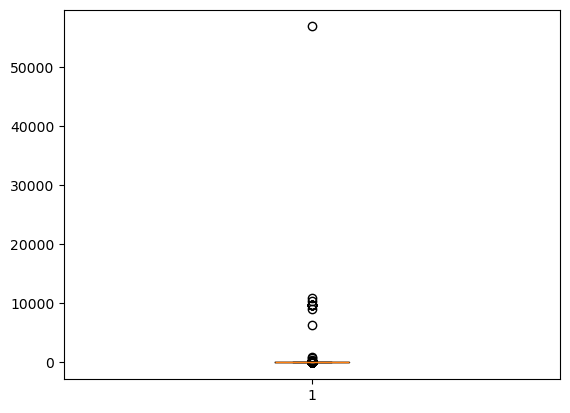

In [87]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
plt.boxplot(dfFinalData['trip_distance'])


In [88]:
#sns.barplot(dfFinalData['trip_distance'],dfFinalData['fare_amount'])
#ply

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [92]:
# remove passenger_count > 6
#dfFinalData[
(dfFinalData['passenger_count'] > 6).sum()
dfFinalData = dfFinalData[(dfFinalData['passenger_count'] < 7)]
len(dfFinalData)

1831434

In [93]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
#columns_to_process = 
df = dfFinalData.copy()
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_cleaned = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

#dfoutlier = dfFinalData.copy()
#remove_outliers_iqr(dfoutlier)
#len(dfoutlier)

In [94]:
import pandas as pd

# Create a copy of the original DataFrame
df = dfFinalData.copy()

# List of columns to process
columns_to_process = ['trip_distance', 'fare_amount',  'tip_amount', 'total_amount','payment_type']

# Iterate over each column
for col in columns_to_process:
    if col in df.columns:
        # Calculate Q1 and Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    else:
        print(f"Column '{col}' does not exist in the DataFrame.")

# The cleaned DataFrame is now stored in 'df'


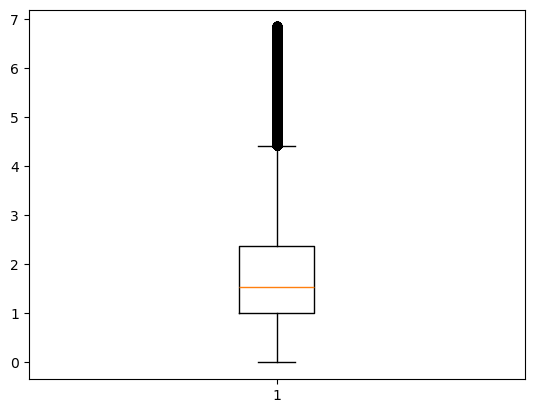

In [95]:
# Do any columns need standardising? // process of removing the rupees 
#for columns in df_cleaned
df_cleaned = df.copy()
plt.boxplot(df_cleaned['trip_distance'])
plt.show()


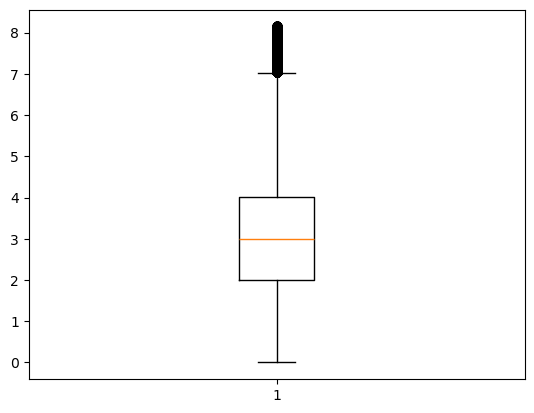

In [96]:
plt.boxplot(df_cleaned['tip_amount'])
plt.show()

<Axes: xlabel='payment_type'>

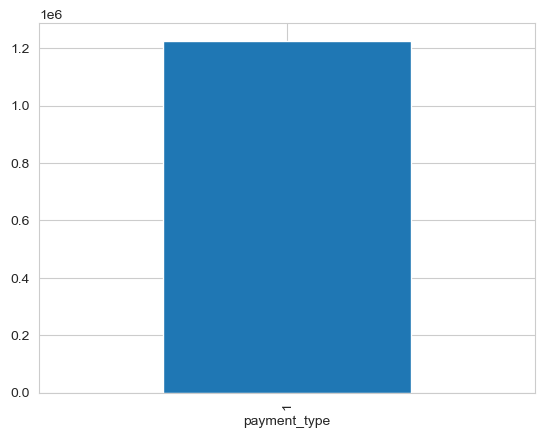

In [163]:
#plt.boxplot(df_cleaned['payment_type'])
#plt.show()
#plot the bar chart for this 
#df_cleaned['payment_type'].value_counts().plot(kind='bar')
dfFinalData['payment_type'].value_counts().plot(kind='bar')

In [98]:
df_cleaned.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1          2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2          2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
5          1  2023-01-01 00:55:02   2023-01-01 00:59:57              1.0   
11         2  2023-01-01 00:34:19   2023-01-01 00:46:44              1.0   
12         2  2023-01-01 00:57:00   2023-01-01 01:09:08              2.0   
14         2  2023-01-01 00:40:19   2023-01-01 01:03:17              1.0   
15         2  2023-01-01 00:14:29   2023-01-01 00:30:59              1.0   
16         2  2023-01-01 00:28:37   2023-01-01 00:33:33              3.0   
18         1  2023-01-01 00:05:27   2023-01-01 00:09:40              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            2.85         1.0                  N           263            41   
1            1.32         1.0                  N            90           137   
2            3.17         1.0                  N            79           141   
5            0.60         1.0                  N           237           237   
11           2.55         1.0                  N           237           239   
12           2.13         1.0                  N           237           236   
14           4.84         1.0                  N           249           236   
15           1.68         1.0                  N            68            79   
16           1.05         1.0                  N           170           107   
18           1.20         1.0                  N           162           141   

    payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0              1  ...    1.0      0.5        4.12           0.0   
1              1  ...    1.0      0.5        3.56           0.0   
2              1  ...    1.0      0.5        3.98           0.0   
5              1  ...    3.5      0.5        2.30           0.0   
11             1  ...    1.0      0.5        1.50           0.0   
12             1  ...    1.0      0.5        2.00           0.0   
14             1  ...    1.0      0.5        6.08           0.0   
15             1  ...    1.0      0.5        4.12           0.0   
16             1  ...    1.0      0.5        2.44           0.0   
18             1  ...    3.5      0.5        2.55           0.0   

    improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                     1.0         24.72                   2.5          0.0   
1                     1.0         21.36                   2.5          0.0   
2                     1.0         23.88                   2.5          0.0   
5                     1.0         13.80                   2.5          0.0   
11                    1.0         21.40                   2.5          0.0   
12                    1.0         21.20                   2.5          0.0   
14                    1.0         36.48                   2.5          0.0   
15                    1.0         24.72                   2.5          0.0   
16                    1.0         14.64                   2.5          0.0   
18                    1.0         15.45                   2.5          0.0   

    Airport_fee  year  
0           NaN  2023  
1           NaN  2023  
2           NaN  2023  
5           NaN  2023  
11          NaN  2023  
12          NaN  2023  
14          NaN  2023  
15          NaN  2023  
16          NaN  2023  
18          NaN  2023  

[10 rows x 21 columns]

In [99]:
dfFinalData.describe()

VendorID           tpep_pickup_datetime  passenger_count  \
count  1.831434e+06                        1831434     1.831434e+06   
mean   1.736381e+00  2023-07-01 21:12:31.858180608     1.369074e+00   
min    1.000000e+00            2023-01-01 00:00:08     0.000000e+00   
25%    1.000000e+00  2023-04-01 20:09:33.750000128     1.000000e+00   
50%    2.000000e+00     2023-06-26 08:15:54.500000     1.000000e+00   
75%    2.000000e+00            2023-10-05 19:14:57     1.000000e+00   
max    2.000000e+00            2023-12-31 23:58:34     6.000000e+00   
std    4.405953e-01                            NaN     8.924992e-01   

       trip_distance    RatecodeID  PULocationID  DOLocationID  payment_type  \
count   1.831434e+06  1.831434e+06  1.831434e+06  1.831434e+06  1.831434e+06   
mean    3.548733e+00  1.634906e+00  1.654478e+02  1.643280e+02  1.205002e+00   
min     0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%     1.050000e+00  1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00   
50%     1.780000e+00  1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00   
75%     3.370000e+00  1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00   
max     5.682380e+04  9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00   
std     4.986664e+01  7.395846e+00  6.367318e+01  6.974050e+01  4.665007e-01   

        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  1.831434e+06  1.831434e+06  1.831434e+06  1.831434e+06  1.831434e+06   
mean   1.982233e+01  1.638387e+00  4.953418e-01  3.573726e+00  5.956821e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.300000e+00  0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00   
50%    1.350000e+01  1.000000e+00  5.000000e-01  2.860000e+00  0.000000e+00   
75%    2.190000e+01  2.500000e+00  5.000000e-01  4.450000e+00  0.000000e+00   
max    1.431635e+05  1.425000e+01  4.000000e+00  2.230800e+02  1.430000e+02   
std    1.073580e+02  1.836193e+00  4.835022e-02  4.073405e+00  2.182965e+00   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.831434e+06  1.831434e+06          1.831434e+06   
mean            9.993007e-01  2.894626e+01          2.307766e+00   
min             0.000000e+00  0.000000e+00          0.000000e+00   
25%             1.000000e+00  1.596000e+01          2.500000e+00   
50%             1.000000e+00  2.100000e+01          2.500000e+00   
75%             1.000000e+00  3.070000e+01          2.500000e+00   
max             1.000000e+00  1.431675e+05          2.500000e+00   
std             2.458984e-02  1.082358e+02          6.660567e-01   

        airport_fee   Airport_fee       year  
count  1.831434e+06  1.682962e+06  1831434.0  
mean   1.429193e-01  1.459070e-01     2023.0  
min    0.000000e+00  0.000000e+00     2023.0  
25%    0.000000e+00  0.000000e+00     2023.0  
50%    0.000000e+00  0.000000e+00     2023.0  
75%    0.000000e+00  0.000000e+00     2023.0  
max    1.750000e+00  1.750000e+00     2023.0  
std    4.648707e-01  4.733739e-01        0.0

In [100]:
dfFinalData['trip_distance'].shape


(1831434,)

In [101]:
df_cleaned['trip_distance'].shape

(1226882,)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [103]:
#df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`
These are numercial data 

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [108]:
# Find and show the hourly trends in taxi pickups
#Hour = {1,2,3,4,5,df_cleaned
dfFinalData = df_cleaned.copy()
df_trend = df_cleaned.copy()
df_trend['tpep_pickup_datetime'] = pd.to_datetime(df_trend['tpep_pickup_datetime'])
df_trend['hour']  = df_trend['tpep_pickup_datetime'].dt.hour
#dfFinalData['date']  = dfFinalData['tpep_pickup_datetime'].dt.day
#sns.plot(data = dfFinalData, 'tpep_pickup_datetime', Hour
#dfFinalData3
# Group by hour and count trips
hourly_counts = df_trend.groupby('hour').size().reset_index(name='trip_count')
# Identify the busiest hour
busiest_hour = hourly_counts.loc[hourly_counts['trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['hour']} with {busiest_hour['trip_count']} trips")


Busiest hour: 18 with 91468 trips


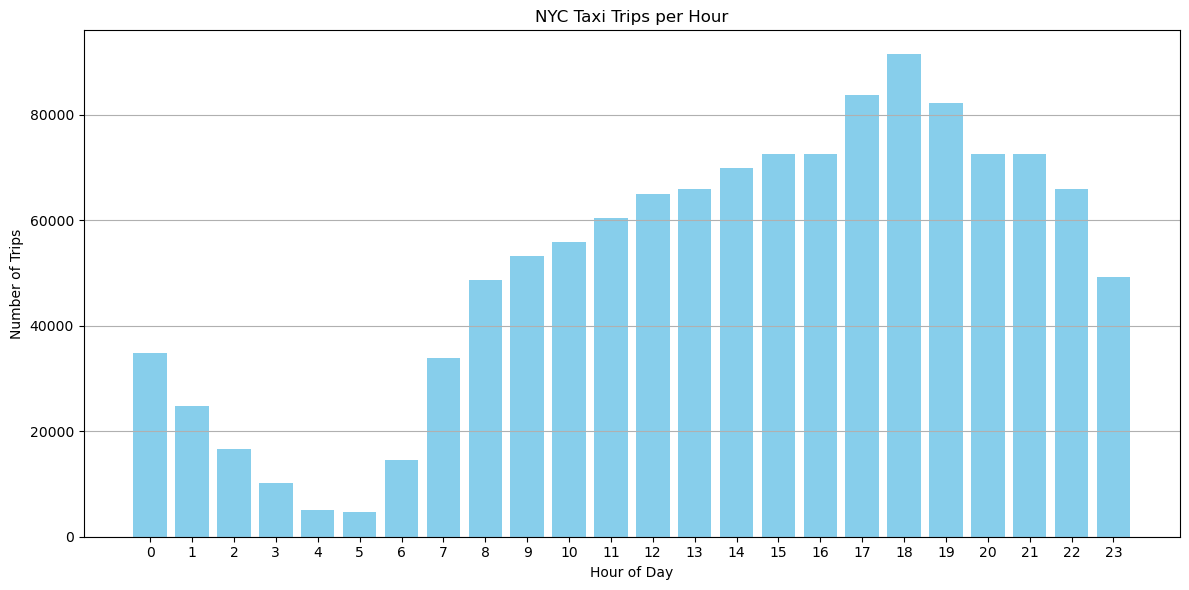

In [109]:
import matplotlib.pyplot as plt

# Plot the trip counts
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts['hour'], hourly_counts['trip_count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('NYC Taxi Trips per Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [110]:
hourly_counts.head()

hour  trip_count
0     0       34765
1     1       24756
2     2       16669
3     3       10263
4     4        5122

C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\2574257895.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette='viridis')


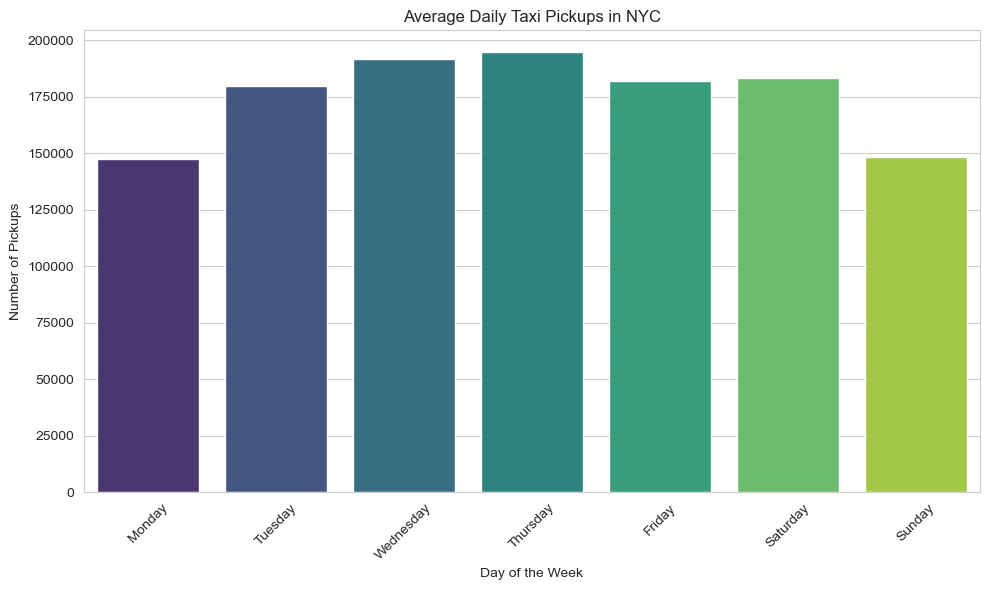

In [111]:
# Find and show the daily trends in taxi pickups (days of the week)
sf = dfFinalData.copy()

# Assuming 'df' is your DataFrame and it has a 'pickup_datetime' column
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Count the number of pickups for each day
pickup_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette='viridis')
plt.title('Average Daily Taxi Pickups in NYC')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [112]:
# Show the monthly trends in pickups
import pandas as pd

# Convert 'pickup_datetime' to datetime format
dfFinalData['tpep_pickup_datetime'] = pd.to_datetime(dfFinalData['tpep_pickup_datetime'])

# Extract the month and year from 'pickup_datetime'
dfFinalData['month'] = dfFinalData['tpep_pickup_datetime'].dt.to_period('M')
# Group by month and count trips
monthly_counts = dfFinalData.groupby('month').size().reset_index(name='trip_count')

monthly_counts.head(12)

month  trip_count
0   2023-01      101501
1   2023-02       97424
2   2023-03      111676
3   2023-04      105818
4   2023-05      112467
5   2023-06      106132
6   2023-07       91298
7   2023-08       88076
8   2023-09       88393
9   2023-10      111532
10  2023-11      107626
11  2023-12      104939

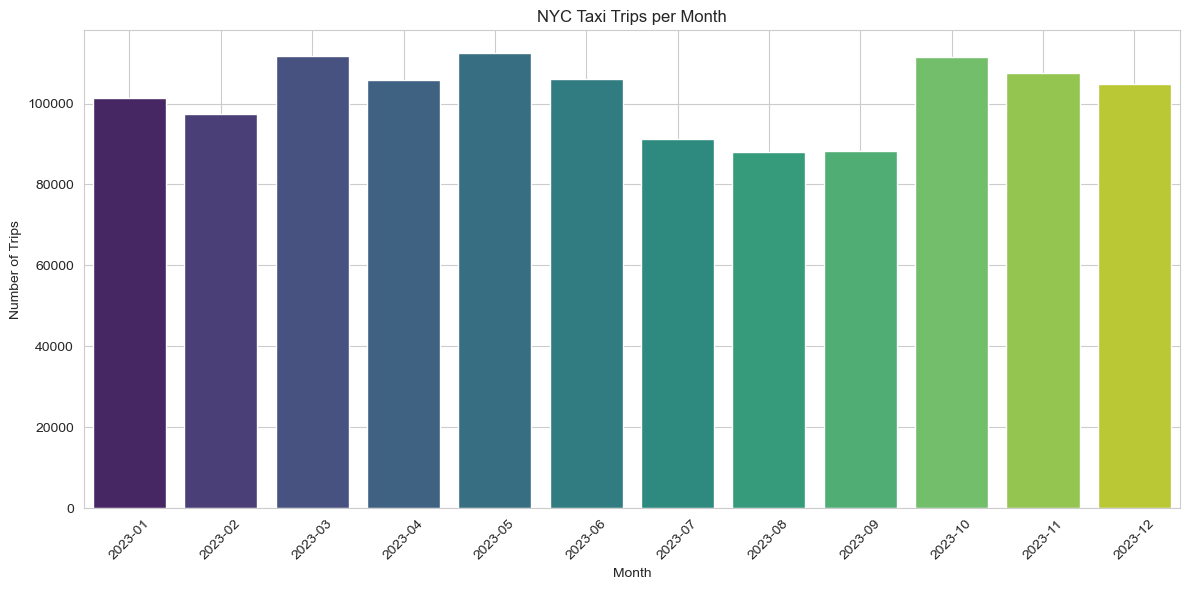

In [113]:
# Convert 'month' to datetime for plotting
#monthly_counts['month'] = pd.to_datetime(monthly_counts['month'])
#monthly_counts['month'] = monthly_counts['month'].to_timestamp()


# Plot the trip counts
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts['month'], y =monthly_counts['trip_count'], palette='viridis', hue = monthly_counts['month'],legend= False)
#sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette='viridis')

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('NYC Taxi Trips per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [116]:
# Analyse the above parameters
dfFinalData.isnull().sum()


VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
airport_fee                   0
Airport_fee              101501
year                          0
month                         0
dtype: int64

In [117]:
Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?
# fix these negative values

fare_amount_with_negative = (dfFinalData['fare_amount'] < 0).sum()
print("fare_amount_with_negative",fare_amount_with_negative)

trip_distance_with_negative = (dfFinalData['trip_distance'] < 0).sum()
print("trip_distance_with_negative", trip_distance_with_negative)

tip_amount_with_negative = (dfFinalData['tip_amount'] < 0).sum()
print("tip_amount_with_negative", tip_amount_with_negative)

total_amount_with_negative = (dfFinalData['total_amount'] < 0).sum()
print("total_amount_with_negative", total_amount_with_negative)
#airport_fee	Airport_fee
#Removed All the rows having negative values 


Object `values` not found.
fare_amount_with_negative 0
trip_distance_with_negative 0
tip_amount_with_negative 0
total_amount_with_negative 0


In [118]:
# fix these negative values
dfFinalData['total_amount'] = dfFinalData['total_amount'].fillna(dfFinalData['total_amount'].median())



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
dfFinalData.isnull().sum()

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.
dfFinalData.isnull().sum()
**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [121]:
# Create a df with non zero entries for the selected parameters.
dfFinalData.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag            0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
airport_fee                   0
Airport_fee              101501
year                          0
month                         0
dtype: int64

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend


In [123]:

df = dfFinalData.copy()

# Convert 'pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the month and year
df['month'] = df['tpep_pickup_datetime'].dt.to_period('M')
# Group by month and sum the total_amount
monthly_revenue = df.groupby('month')['total_amount'].sum().reset_index()

# Convert 'month' to datetime for plotting
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()



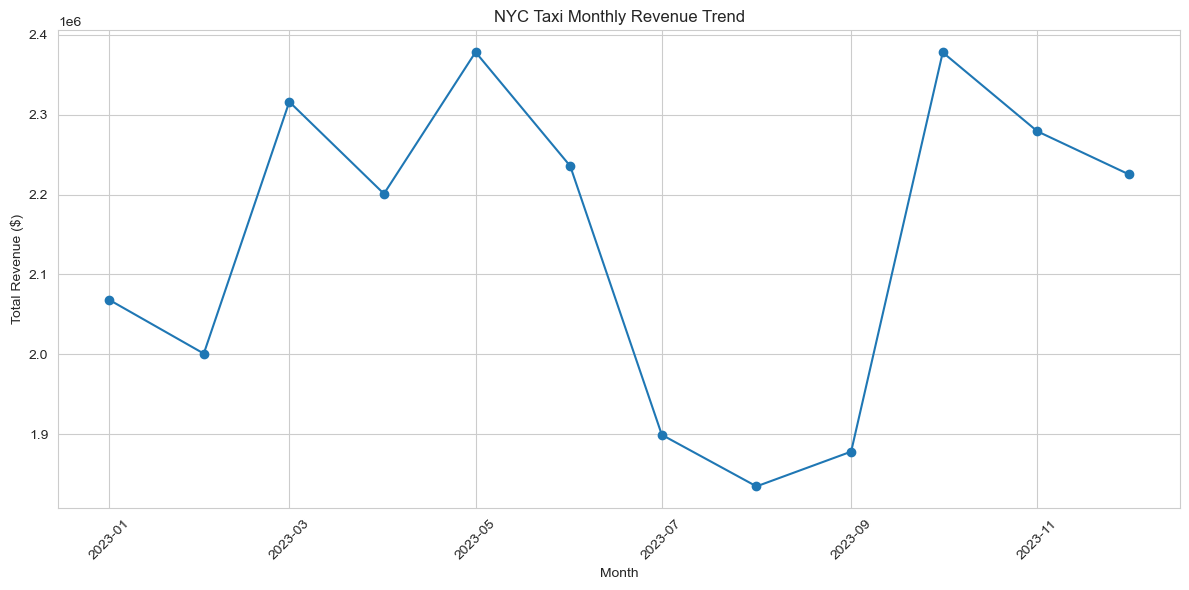

In [124]:
import matplotlib.pyplot as plt

# Plot the monthly revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month'], monthly_revenue['total_amount'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('NYC Taxi Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
import matplotlib.pyplot as plt

# Plot the monthly revenue
plt.figure(figsize=(12, 6))
#plt.plot(monthly_revenue['month'], monthly_revenue['total_amount'], marker='o', linestyle='-')
sns.barplot(x= monthly_revenue['month'], y = monthly_revenue['total_amount'] )
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('NYC Taxi Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
monthly_revenue.head()

month  total_amount
0 2023-01-01    2068144.43
1 2023-02-01    2000768.95
2 2023-03-01    2316140.81
3 2023-04-01    2200912.34
4 2023-05-01    2378324.44

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [128]:
# Calculate proportion of each quarter
#df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
df = dfFinalData.copy()

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickupDate'] = df['tpep_pickup_datetime'].dt.date
df['pickupDate'] = pd.to_datetime(df['pickupDate'])
#df['pickupDate'].head()
df['pickup_quarter'] = df['pickupDate'].dt.to_period('Q')
df['pickup_quarter'].unique()
df['year'] = df['tpep_pickup_datetime'].dt.year
df['year'].unique()
df = df[df['year'] == 2023]
df['year'].value_counts()
quarterly_totals = df.groupby('pickup_quarter')['total_amount'].sum().reset_index()
total_sum = quarterly_totals['total_amount'].sum()
quarterly_totals['proportion'] = quarterly_totals['total_amount'] / total_sum
quarterly_totals['proportion'] = (quarterly_totals['proportion'] * 100).round(2)

quarterly_totals.head()

pickup_quarter  total_amount  proportion
0         2023Q1    6385054.19       24.85
1         2023Q2    6814884.14       26.52
2         2023Q3    5611520.93       21.84
3         2023Q4    6882275.83       26.79

In [129]:
#df['year'].value_counts()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

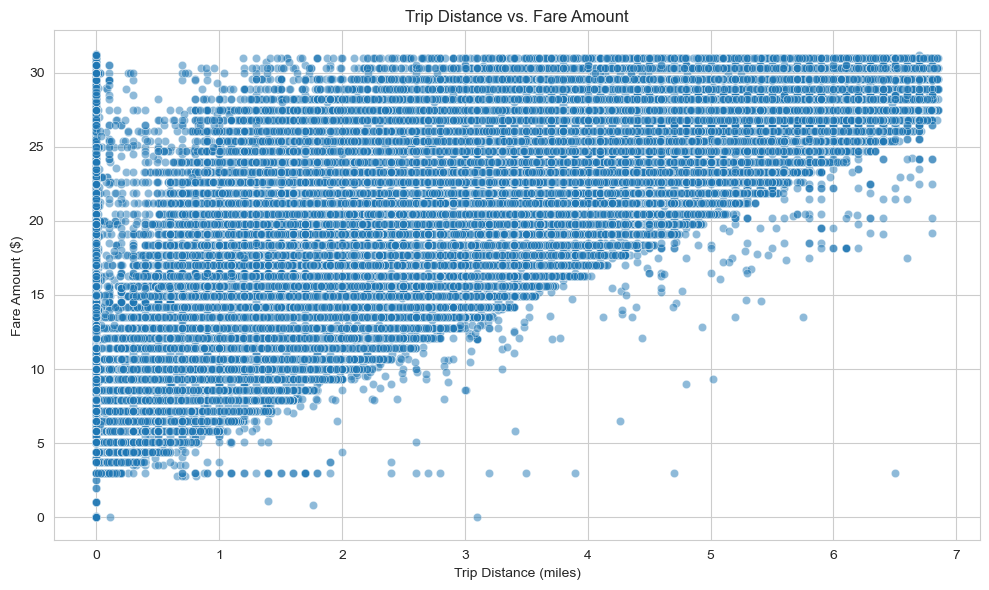

In [131]:
#sns.boxplot(data= dfFinalData, x = 'trip_distance', y = 'fare_amount')
#Has distance increaes fare also increases

import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = dfFinalData, x= 'trip_distance', y ='fare_amount', alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Distance vs. Fare Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


In [132]:
# Calculate the Pearson correlation coefficient
correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
#A coefficient close to 1 suggests that as trip distance increases, fare amount also increases, which is expected in taxi fare calculations.

Pearson correlation coefficient: 0.8586


In [133]:
# Show how trip fare is affected by distance
s2 = dfFinalData.copy()
#s2.drop(s2[(s2['trip_distance'] > 0) & (s2['trip_distance'] < 5) & (s2['fare_amount'] > 120000)], axis =1)
#dfFinalData[['trip_distance', 'fare_amount']].describe()
# Define thresholds
trip_distance_threshold = 0.5  # Adjust as needed
fare_amount_threshold = 100    # Adjust as needed

# Filter the DataFrame
df_filtered1 = dfFinalData[~((dfFinalData['trip_distance'] < trip_distance_threshold) & (dfFinalData['fare_amount'] > fare_amount_threshold))]


In [165]:
rows_removed = len(dfFinalData) - len(df_filtered1)
print(f"Number of rows removed: {rows_removed}")


Number of rows removed: 0


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

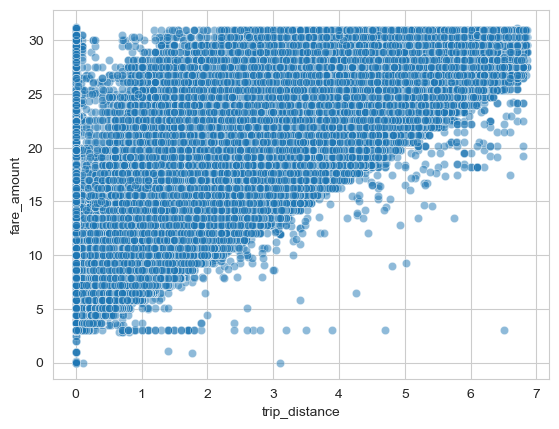

In [167]:
sns.scatterplot(data = df_filtered1, x= 'trip_distance', y ='fare_amount', alpha=0.5)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
#sns.barplot(data= dfFinalData, x = 'passenger_count', y = 'fare_amount')



# Show relationship between fare and trip duration
#sns.barplot(data= dfFinalData, x = 'fare_amount', y = 'trip_distance')


In [169]:
q2 = dfFinalData.copy()

import pandas as pd

# Convert to datetime
q2['tpep_pickup_datetime'] = pd.to_datetime(q2['tpep_pickup_datetime'])
q2['tpep_dropoff_datetime'] = pd.to_datetime(q2['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
q2['trip_duration'] = (q2['tpep_dropoff_datetime'] - q2['tpep_pickup_datetime']).dt.total_seconds() / 60



In [171]:
q2['trip_duration'].describe()

count    1.226882e+06
mean     1.300023e+01
std      3.631146e+01
min     -5.430000e+01
25%      7.033333e+00
50%      1.088333e+01
75%      1.601667e+01
max      1.439667e+03
Name: trip_duration, dtype: float64

In [187]:
q3 = q2.copy()
q3 = q3 [q3['trip_duration'] < 100]
#q3['trip_duration'] > 0

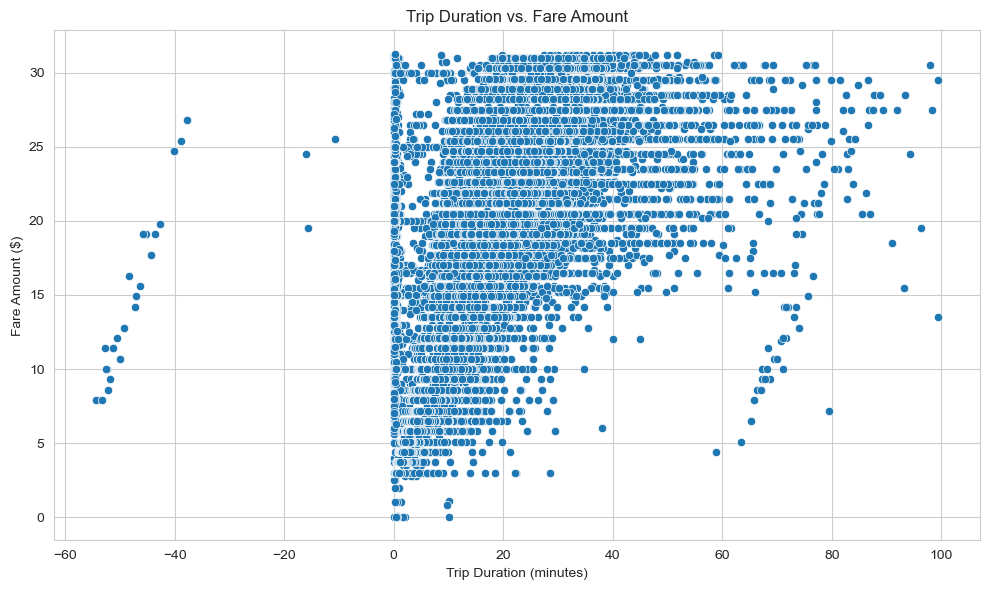

In [189]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data = q3, x= 'trip_duration', y ='fare_amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Duration vs. Fare Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
correlation = q2['trip_duration'].corr(q2['fare_amount'])
print(f"Pearson correlation coefficient: {correlation:.4f}")


In [201]:
q4 = q2.copy()
q4 = q4 [(q4['trip_duration'] > 1300) & (q4['trip_duration']  < 2000)]


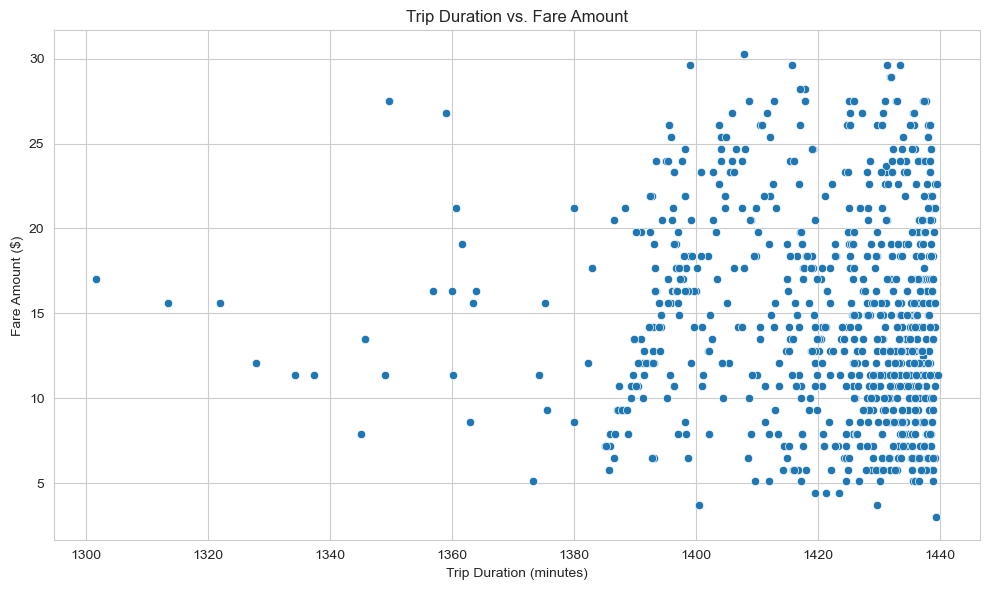

In [202]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data = q4, x= 'trip_duration', y ='fare_amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Duration vs. Fare Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


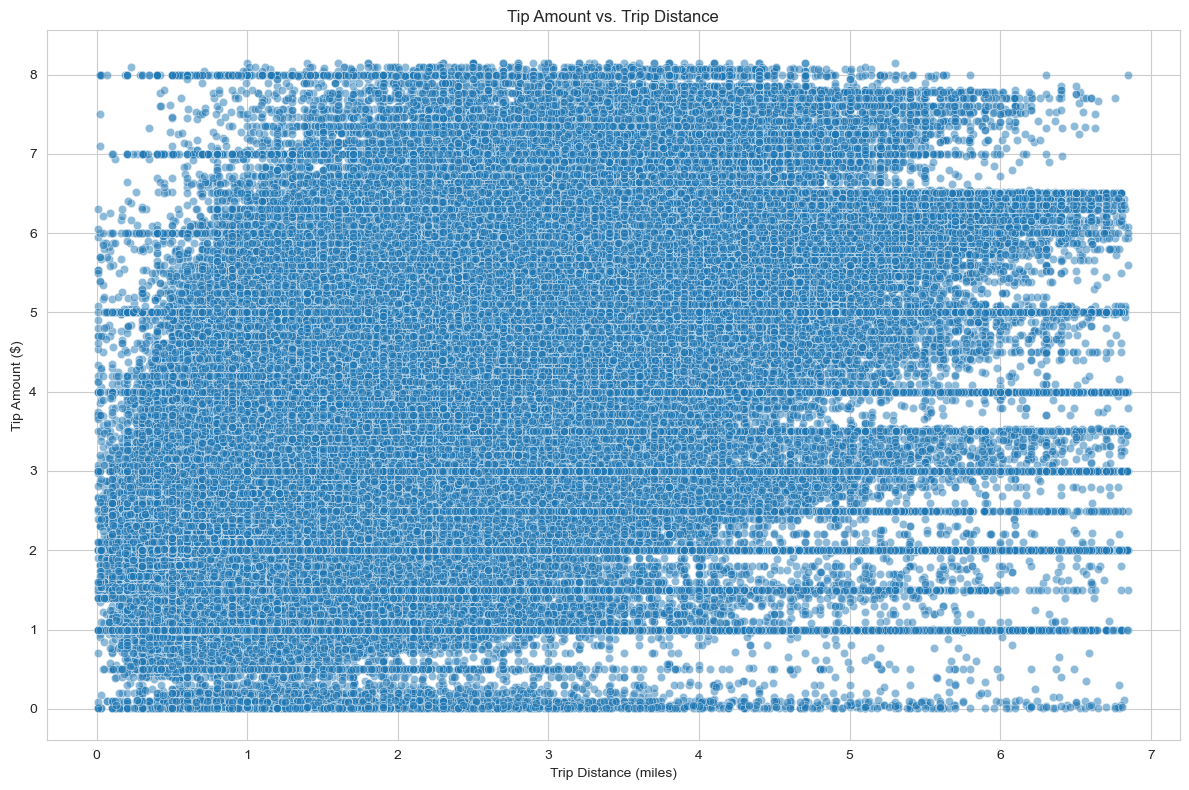

In [217]:

# Filter out entries with zero or negative trip distances and tip amounts
df_tip = dfFinalData[(dfFinalData['trip_distance'] >  0) & (dfFinalData['tip_amount'] > 0)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_tip, alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Tip Amount vs. Trip Distance')
plt.grid(True)
plt.tight_layout()
plt.show()
# After 5 miles hardly anyone gives more than 10 dollers 
# For distance between 0 to 7 miles , motsly likle the tip is 10 dollers 

In [225]:
correlation = dfFinalData['tip_amount'].corr(dfFinalData['trip_distance'])
print(f"Pearson correlation coefficient: {correlation:.4f}")


Pearson correlation coefficient: 0.4636


In [227]:
df_tip.describe()

VendorID           tpep_pickup_datetime  passenger_count  \
count  1.170977e+06                        1170977     1.170977e+06   
mean   1.737710e+00  2023-06-30 20:00:23.089139712     1.344286e+00   
min    1.000000e+00            2023-01-01 00:02:43     0.000000e+00   
25%    1.000000e+00            2023-03-30 19:14:17     1.000000e+00   
50%    2.000000e+00            2023-06-23 21:04:25     1.000000e+00   
75%    2.000000e+00            2023-10-06 00:29:44     1.000000e+00   
max    2.000000e+00            2023-12-31 23:56:25     6.000000e+00   
std    4.398794e-01                            NaN     8.767946e-01   

       trip_distance    RatecodeID  PULocationID  DOLocationID  payment_type  \
count   1.170977e+06  1.170977e+06  1.170977e+06  1.170977e+06     1170977.0   
mean    1.822817e+00  1.001365e+00  1.703622e+02  1.689647e+02           1.0   
min     1.000000e-02  1.000000e+00  1.000000e+00  1.000000e+00           1.0   
25%     1.000000e+00  1.000000e+00  1.400000e+02  1.370000e+02           1.0   
50%     1.540000e+00  1.000000e+00  1.630000e+02  1.630000e+02           1.0   
75%     2.370000e+00  1.000000e+00  2.360000e+02  2.360000e+02           1.0   
max     6.850000e+00  5.000000e+00  2.650000e+02  2.650000e+02           1.0   
std     1.116931e+00  7.297477e-02  6.456588e+01  6.769945e+01           0.0   

        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  1.170977e+06  1.170977e+06  1.170977e+06  1.170977e+06  1.170977e+06   
mean   1.304574e+01  1.444422e+00  4.997116e-01  3.238021e+00  7.099567e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e-02  0.000000e+00   
25%    8.600000e+00  0.000000e+00  5.000000e-01  2.200000e+00  0.000000e+00   
50%    1.210000e+01  1.000000e+00  5.000000e-01  3.020000e+00  0.000000e+00   
75%    1.630000e+01  2.500000e+00  5.000000e-01  4.080000e+00  0.000000e+00   
max    3.100000e+01  9.250000e+00  4.000000e+00  8.150000e+00  1.475000e+01   
std    5.567056e+00  1.462202e+00  1.278464e-02  1.391490e+00  2.146730e-01   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.170977e+06  1.170977e+06          1.170977e+06   
mean            9.996868e-01  2.104729e+01          2.450208e+00   
min             0.000000e+00  4.510000e+00          0.000000e+00   
25%             1.000000e+00  1.596000e+01          2.500000e+00   
50%             1.000000e+00  1.980000e+01          2.500000e+00   
75%             1.000000e+00  2.520000e+01          2.500000e+00   
max             1.000000e+00  3.932000e+01          2.500000e+00   
std             1.481974e-02  6.657303e+00          3.492854e-01   

        airport_fee   Airport_fee       year  
count  1.170977e+06  1.073705e+06  1170977.0  
mean   7.425210e-03  7.577500e-03     2023.0  
min    0.000000e+00  0.000000e+00     2023.0  
25%    0.000000e+00  0.000000e+00     2023.0  
50%    0.000000e+00  0.000000e+00     2023.0  
75%    0.000000e+00  0.000000e+00     2023.0  
max    1.750000e+00  1.750000e+00     2023.0  
std    1.105467e-01  1.126051e-01        0.0

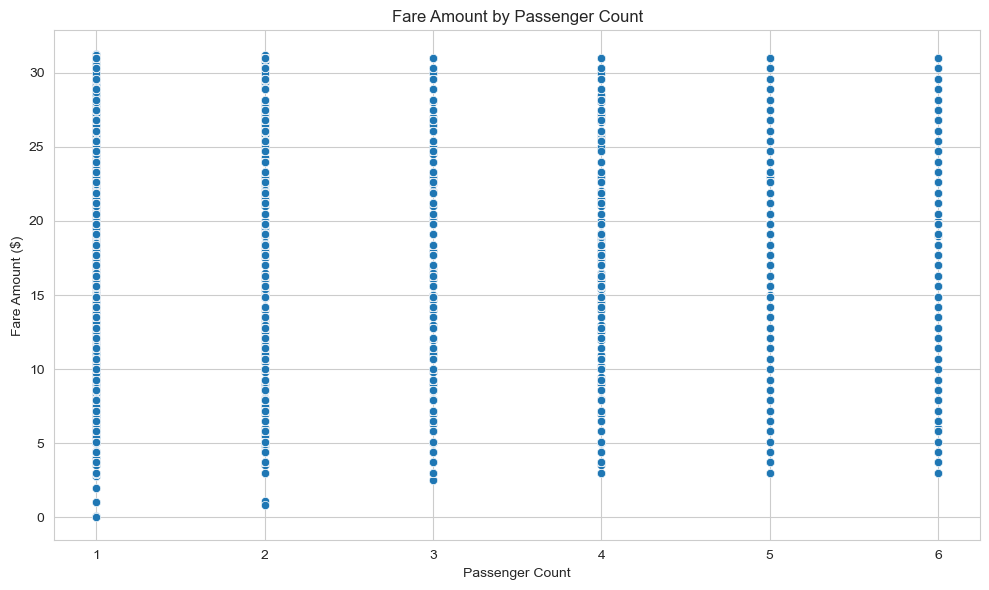

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the NYC taxi data

# Filter out entries with zero or negative passenger counts and fare amounts
passengerData = dfFinalData[(dfFinalData['passenger_count'] > 0) & (dfFinalData['fare_amount'] > 0)]

plt.figure(figsize=(10, 6))
#sns.boxplot(x='passenger_count', y='fare_amount', data=df_filtered)
sns.scatterplot(x='passenger_count', y='fare_amount', data=passengerData)

plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount by Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()
# Remove the passenger count from outlier list and rerun this 

In [236]:
correlation = passengerData['fare_amount'].corr(passengerData['passenger_count'])
print(f"Pearson correlation coefficient: {correlation:.4f}")


Pearson correlation coefficient: 0.0152


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

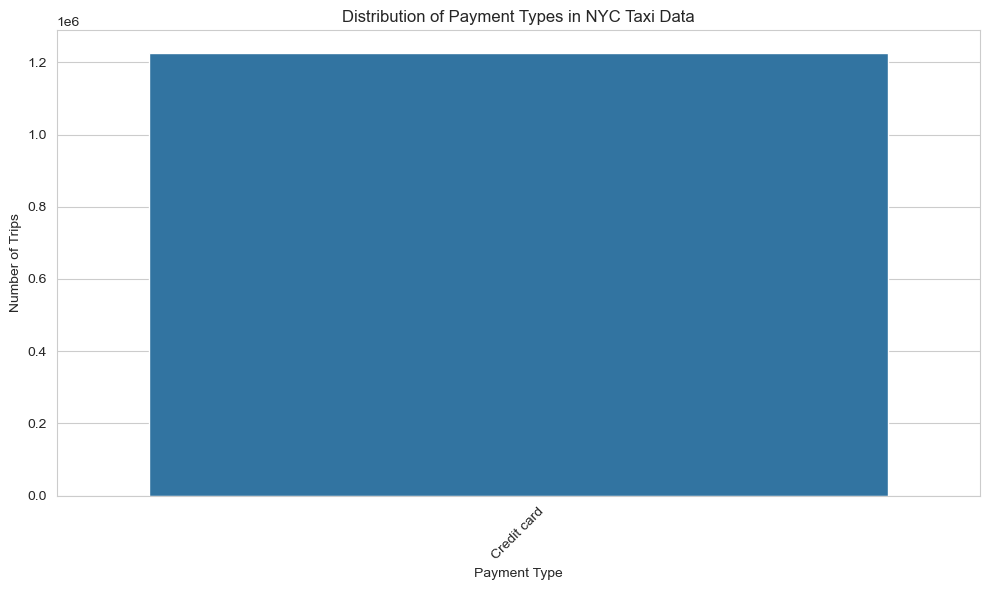

In [247]:
# Analyse the distribution of different payment types (payment_type).

#df = 
# Assuming 'df' is your DataFrame containing the NYC taxi data
# Map payment_type codes to descriptive labels
payment_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}
dfFinalData['payment_type_label'] = dfFinalData['payment_type'].map(payment_mapping)

# Calculate the count of each payment type
payment_counts = dfFinalData['payment_type_label'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
#payment_counts.plot(kind='bar', color='skyblue')
sns.barplot(payment_counts)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Distribution of Payment Types in NYC Taxi Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
#Analyses of NYC taxi data have shown that credit card and cash payments dominate the payment methods. For instance, a study indicated that approximately 53.89% of payments were made with credit cards, while 45.68% were in cash. Other payment types like 'No charge', 'Dispute', 'Unknown', and 'Voided trip' collectively accounted for less than 1% of the transactions

In [251]:
#payment_counts.head()
dfFinalData['payment_type'].value_counts()

payment_type
1    1226882
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [257]:
#pip install geopandas
import geopandas as gpd
print(gpd.__version__)
import os
#os.chdir('C:/Users/satya s/OneDrive/Desktop/theju/MLandAIcourse/EDA_TAXI_CASESTUDYASSINMENT/Datasets and Dictionary/taxi_zones')
os.chdir('../trip_zones')

zones = gpd.read_file('taxi_zones.shp')

1.0.1


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.
geoDF.head()

In [261]:
# import geopandas as gpd


# Read the shapefile using geopandas
#zones = # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

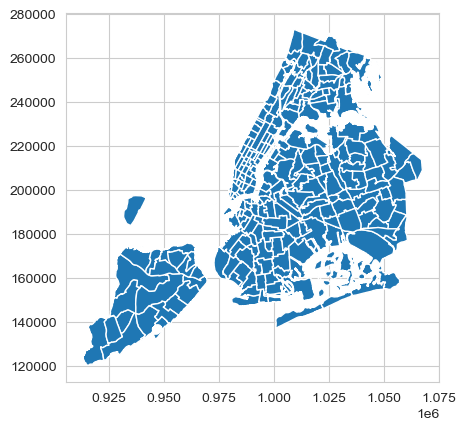

In [264]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [267]:
# Merge zones and trip records using locationID and PULocationID
trips = dfFinalData.copy()
# Merge on DOLocationID to get drop-off zone information
trips = trips.merge(zones, how='left', left_on='DOLocationID', right_on='LocationID')

 #Rename the merged columns for clarity
#trips.rename(columns={
 #   'Borough': 'dropoff_borough',
  #  'Zone': 'dropoff_zone',
#    'service_zone': 'dropoff_service_zone'
#}, inplace=True)

# Drop the redundant LocationID column from the merge
trips.drop('LocationID', axis=1, inplace=True)


In [268]:
trips.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         1  2023-01-01 00:55:02   2023-01-01 00:59:57              1.0   
4         2  2023-01-01 00:34:19   2023-01-01 00:46:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85         1.0                  N           263            41   
1           1.32         1.0                  N            90           137   
2           3.17         1.0                  N            79           141   
3           0.60         1.0                  N           237           237   
4           2.55         1.0                  N           237           239   

   payment_type  ...  Airport_fee  year    month  payment_type_label  \
0             1  ...          NaN  2023  2023-01         Credit card   
1             1  ...          NaN  2023  2023-01         Credit card   
2             1  ...          NaN  2023  2023-01         Credit card   
3             1  ...          NaN  2023  2023-01         Credit card   
4             1  ...          NaN  2023  2023-01         Credit card   

   OBJECTID  Shape_Leng  Shape_Area                   zone    borough  \
0      41.0    0.052793    0.000143         Central Harlem  Manhattan   
1     137.0    0.046108    0.000116               Kips Bay  Manhattan   
2     141.0    0.041514    0.000077        Lenox Hill West  Manhattan   
3     237.0    0.042213    0.000096  Upper East Side South  Manhattan   
4     239.0    0.063626    0.000205  Upper West Side South  Manhattan   

                                            geometry  
0  POLYGON ((998716.913 234240.397, 999458.736 23...  
1  POLYGON ((991954.728 209026.462, 991949.076 20...  
2  POLYGON ((994839.073 216123.698, 994786.74 216...  
3  POLYGON ((993633.442 216961.016, 993507.232 21...  
4  POLYGON ((991168.979 226252.992, 991955.565 22...  

[5 rows x 29 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [271]:
# Group data by location and calculate the number of trips
#trips.head()
trips = dfFinalData.copy()
trip_counts = trips.groupby('PULocationID').size().reset_index(name='trip_count')
trip_counts = trip_counts.merge(zones, left_on='PULocationID', right_on='LocationID')
# Sort by trip count descending
trip_counts_sorted = trip_counts.sort_values(by='trip_count', ascending=False)

# Display top 10 zones by trip count
print(trip_counts_sorted[['zone', 'trip_count']].head(10))
#trip_counts_sorted.head()

                             zone  trip_count
212         Upper East Side South       67657
142                Midtown Center       63036
211         Upper East Side North       60949
143                  Midtown East       49554
124           Lincoln Square East       47104
165  Penn Station/Madison Sq West       45561
151                   Murray Hill       41061
214         Upper West Side South       39401
209                      Union Sq       39028
205     Times Sq/Theatre District       38997


In [287]:
trip_counts_sortedtop10 = trip_counts_sorted[:10]
trip_counts_sortedtop10
#sns.barplot(data = trip_counts_sortedtop10, x = 'zone', y ='trip_count')

plt.figure(figsize=(12, 8))
#sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette='Blues_d')
sns.barplot(data = trip_counts_sortedtop10, x = 'zone', y ='trip_count')

#plt.title('Number of Taxi Trips per Hour')
#plt.xlabel('Hour of Day')
#plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [290]:
# Merge trip counts back to the zones GeoDataFrame
zones_gdf = zones.copy()
# Merge trip counts into the zones GeoDataFrame
zones_with_counts = zones_gdf.merge(trip_counts_sorted, left_on='LocationID', right_on='PULocationID', how='left')
# Replace NaN values in 'trip_count' with 0
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)


#import geopandas as gpd
#from shapely import wkt

# Convert the 'geometry' column from WKT strings to Shapely geometry objects
#zones_with_counts['geometry'] = zones_with_counts['geometry'].apply(wkt.loads)

# Create a GeoDataFrame from the DataFrame
#gdf = gpd.zones_with_counts(df, geometry='geometry')

# Optionally, set the Coordinate Reference System (CRS) if known
#gdf.set_crs(epsg=4326, inplace=True)  # Replace 4326 with your CRS
#gdf['geometry'] = gdf['geometry'].make_valid()
#gdf['geometry'].geom_type.unique()


# Plot the zones colored by trip count
#zones_with_counts.plot(column='trip_count', cmap='OrRd', legend=True, figsize=(10, 10))
#zones_with_counts.plot()
#plt.title('NYC Taxi Trips by Pickup Zone')
#plt.axis('off')
#plt.show()
zones_with_counts.head()


OBJECTID_x  Shape_Leng_x  Shape_Area_x                   zone_x  \
0           1      0.116357      0.000782           Newark Airport   
1           2      0.433470      0.004866              Jamaica Bay   
2           3      0.084341      0.000314  Allerton/Pelham Gardens   
3           4      0.043567      0.000112            Alphabet City   
4           5      0.092146      0.000498            Arden Heights   

   LocationID_x      borough_x  \
0             1            EWR   
1             2         Queens   
2             3          Bronx   
3             4      Manhattan   
4             5  Staten Island   

                                          geometry_x  PULocationID  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...           1.0   
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...           NaN   
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...           3.0   
3  POLYGON ((992073.467 203714.076, 992068.667 20...           4.0   
4  POLYGON ((935843.31 144283.336, 936046.565 144...           NaN   

   trip_count  OBJECTID_y  Shape_Leng_y  Shape_Area_y  \
0        22.0         1.0      0.116357      0.000782   
1         0.0         NaN           NaN           NaN   
2        17.0         3.0      0.084341      0.000314   
3      1446.0         4.0      0.043567      0.000112   
4         0.0         NaN           NaN           NaN   

                    zone_y  LocationID_y  borough_y  \
0           Newark Airport           1.0        EWR   
1                      NaN           NaN        NaN   
2  Allerton/Pelham Gardens           3.0      Bronx   
3            Alphabet City           4.0  Manhattan   
4                      NaN           NaN        NaN   

                                          geometry_y  
0  POLYGON ((933100.918 192536.086, 933091.011 19...  
1                                               None  
2  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3  POLYGON ((992073.467 203714.076, 992068.667 20...  
4                                               None

In [305]:
plt.figure(figsize=(12, 8))
#sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette='Blues_d')
sns.barplot(data = zones_with_counts, x = 'zone_x', y ='trip_count')

#plt.title('Number of Taxi Trips per Hour')
#plt.xlabel('Hour of Day')
#plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [297]:
# Define figure and axis
#fig, ax = plt.subplots(1, 1, figsize = (12, 10))`


# Plot the map and display it
# Create the plot
#fig, ax = plt.subplots(figsize=(12, 12))

#zones_with_counts.set_geometry('trip_count')
##                      cmap='OrRd',
#linewidth=0.8,
 #                      ax=ax,
  #                     edgecolor='0.8',
  #                     legend=True)

# Customize the plot
#ax.set_title('NYC Taxi Pickups by Zone', fontsize=15)
#ax.axis('off')

# Show the plot
#plt.show()



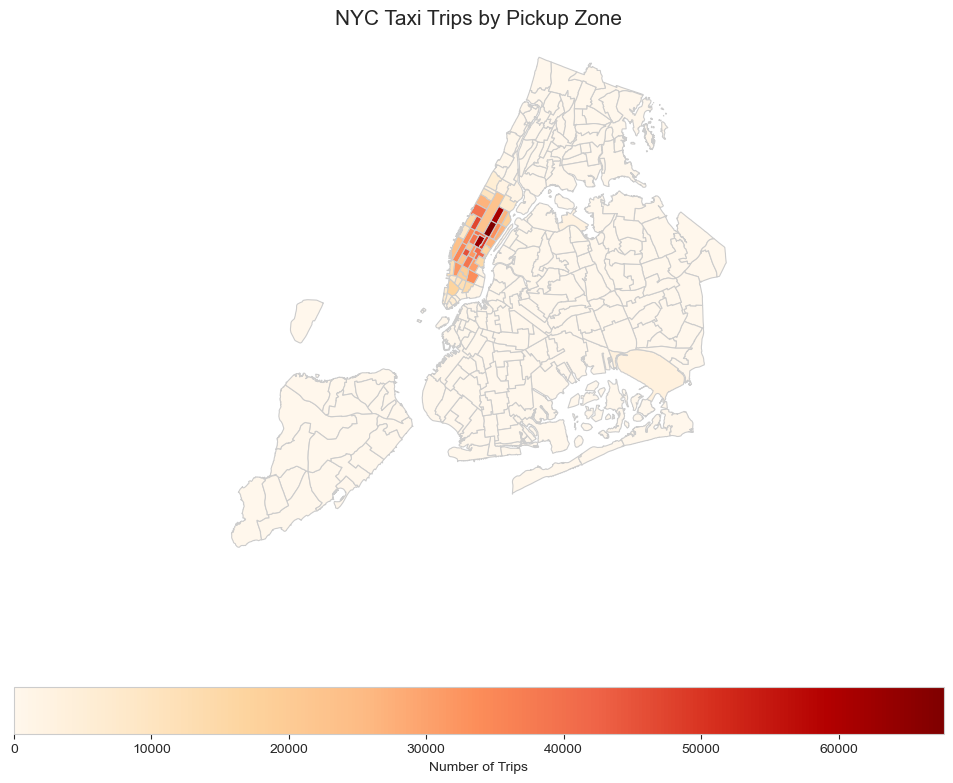

In [299]:
# can you try displaying the zones DF sorted by the number of trips?
tripsdata = dfFinalData.copy()
zonesData = zones.copy()

# Count trips per pickup location ID
trip_counts = tripsdata['PULocationID'].value_counts().reset_index()
trip_counts.columns = ['LocationID', 'trip_count']

# Ensure 'LocationID' is of the same type in both DataFrames
zones['LocationID'] = zones['LocationID'].astype(int)
trip_counts['LocationID'] = trip_counts['LocationID'].astype(int)

# Merge the trip counts with the zone geometries
zones = zones.merge(trip_counts, on='LocationID', how='left')

# Fill NaN values with 0 (zones with no trips)
zones['trip_count'] = zones['trip_count'].fillna(0)

import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the zones with trip counts
zones.plot(column='trip_count',
           cmap='OrRd',
           linewidth=0.8,
           ax=ax,
           edgecolor='0.8',
           legend=True,
           legend_kwds={'label': "Number of Trips",
                        'orientation': "horizontal"})

# Add a title
ax.set_title('NYC Taxi Trips by Pickup Zone', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Remove axis
ax.set_axis_off()

# Show the plot
plt.show()



In [ ]:
zones.head()

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [311]:
dfFinalData.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1          2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2          2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
5          1  2023-01-01 00:55:02   2023-01-01 00:59:57              1.0   
11         2  2023-01-01 00:34:19   2023-01-01 00:46:44              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            2.85         1.0                  N           263            41   
1            1.32         1.0                  N            90           137   
2            3.17         1.0                  N            79           141   
5            0.60         1.0                  N           237           237   
11           2.55         1.0                  N           237           239   

    payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0              1  ...        4.12           0.0                    1.0   
1              1  ...        3.56           0.0                    1.0   
2              1  ...        3.98           0.0                    1.0   
5              1  ...        2.30           0.0                    1.0   
11             1  ...        1.50           0.0                    1.0   

    total_amount  congestion_surcharge  airport_fee  Airport_fee  year  \
0          24.72                   2.5          0.0          NaN  2023   
1          21.36                   2.5          0.0          NaN  2023   
2          23.88                   2.5          0.0          NaN  2023   
5          13.80                   2.5          0.0          NaN  2023   
11         21.40                   2.5          0.0          NaN  2023   

      month  payment_type_label  
0   2023-01         Credit card  
1   2023-01         Credit card  
2   2023-01         Credit card  
5   2023-01         Credit card  
11  2023-01         Credit card  

[5 rows x 23 columns]

In [313]:
import pandas as pd
df = dfFinalData.copy()
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes tpep_pickup_datetime          
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Assuming df is your DataFrame containing taxi trip data
# Calculate trip duration in hours
df['trip_duration_hours'] = df['trip_duration'] / 3600

# Calculate average speed in miles per hour
df['average_speed_mph'] = df['trip_distance'] / df['trip_duration_hours']

# Extract hour from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by pickup and dropoff locations and hour to find average speeds
slow_routes = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['average_speed_mph'].mean().reset_index()

# Identify the slowest routes by sorting
slowest_routes = slow_routes.sort_values(by='average_speed_mph').head(10)

print(slowest_routes)


       PULocationID  DOLocationID  pickup_hour  average_speed_mph
66795           244           126           12       -1110.280374
52625           213            32           11        -810.844630
24048           114           106            1        -293.944954
50427           198            36            1        -116.349810
18935            95           129           12           0.000000
66596           241           241           10           0.000000
66597           241           241           14           0.000000
18955            95           170            9           0.000000
18956            95           173           18           0.000000
18958            95           186           17           0.000000


In [307]:
# Find routes which have the slowest speeds at different times of the day
import pandas as pd

df = dfFinalData.copy()
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes tpep_pickup_datetime          
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Calculate trip distance in miles (ensure 'trip_distance' is in miles)
# If 'trip_distance' is in kilometers, convert it to miles: df['trip_distance'] * 0.621371

# Calculate average speed in mph
df['avg_speed'] = df['trip_distance'] / (df['trip_duration'] / 60)

# Extract hour of the day
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Define route as combination of pickup and drop-off location IDs
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)

# Group by route and hour to calculate average speed
grouped = df.groupby(['route', 'hour']).agg({
    'avg_speed': 'mean',
    'trip_duration': 'count'
}).reset_index().rename(columns={'trip_duration': 'trip_count'})

# Find the slowest route for each hour
slowest_routes = grouped.loc[grouped.groupby('hour')['avg_speed'].idxmin()].reset_index(drop=True)

# Display the results
print(slowest_routes)




      route  hour  avg_speed  trip_count
0    116-41     0   0.000000           1
1   114-106     1  -4.899083           1
2   119-247     2   0.000000           1
3   112-112     3   0.000000           1
4     10-10     4   0.000000           1
5     1-264     5   0.000000           1
6     10-10     6   0.000000           1
7       1-1     7   0.000000           1
8   124-102     8   0.000000           1
9      1-79     9   0.000000           1
10      1-1    10   0.000000           1
11   213-32    11 -13.514077           1
12  244-126    12 -18.504673           1
13   107-42    13   0.000000           1
14  108-165    14   0.000000           1
15      1-1    15   0.000000           2
16   116-48    16   0.000000           1
17   148-74    17   0.000000           1
18    1-264    18   0.000000           1
19      1-1    19   0.000000           1
20    10-10    20   0.000000           1
21    1-264    21   0.000000           1
22      1-1    22   0.000000           1
23  100-127    2

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\2589269442.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette='Blues_d')


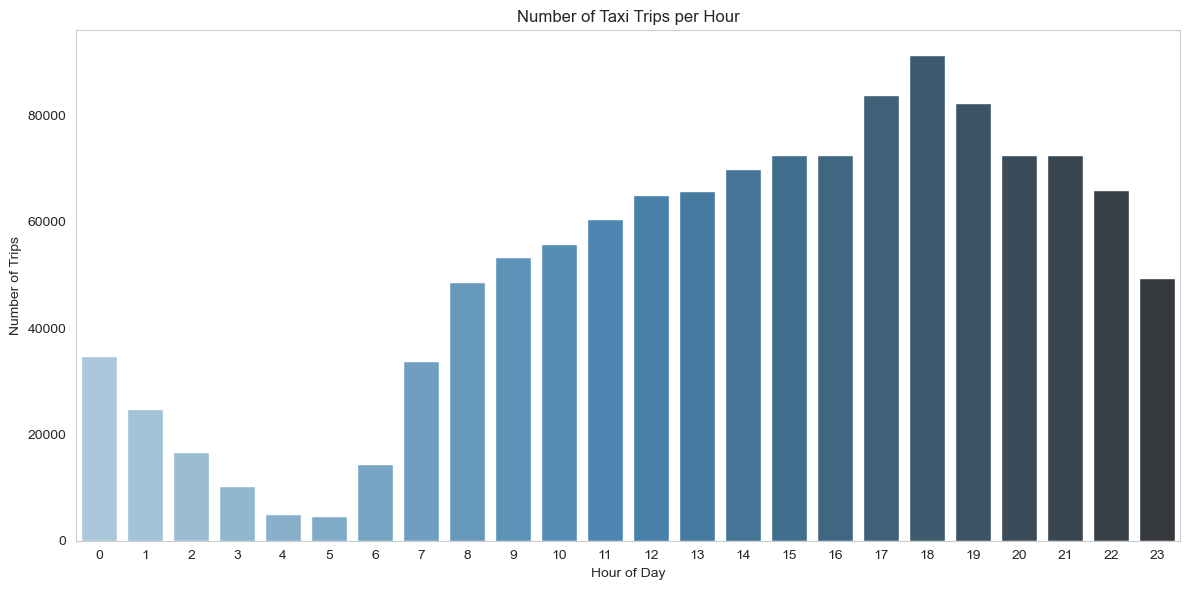

In [315]:
# Visualise the number of trips per hour and find the busiest hour

df = dfFinalData.copy()
# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count the number of trips per hour
hourly_trip_counts = df['pickup_hour'].value_counts().sort_index()

# Identify the busiest hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_count = hourly_trip_counts.max()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette='Blues_d')
plt.title('Number of Taxi Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [ ]:
#Based on the analysis, the busiest hour is {busiest_hour}:00, with {busiest_hour_count} trips. This aligns with findings from previous studies, which indicate that the busiest times are from 3:00 PM to 6:00 PM on weekdays, with the highest number of rides occurring at 6:00 PM on Tuesdays. 

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours


Top 5 Busiest Hours:
18:00 - 19:00 : 91468 trips
17:00 - 18:00 : 83868 trips
19:00 - 20:00 : 82284 trips
16:00 - 17:00 : 72660 trips
15:00 - 16:00 : 72562 trips


C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\2467193163.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette='Blues_d')


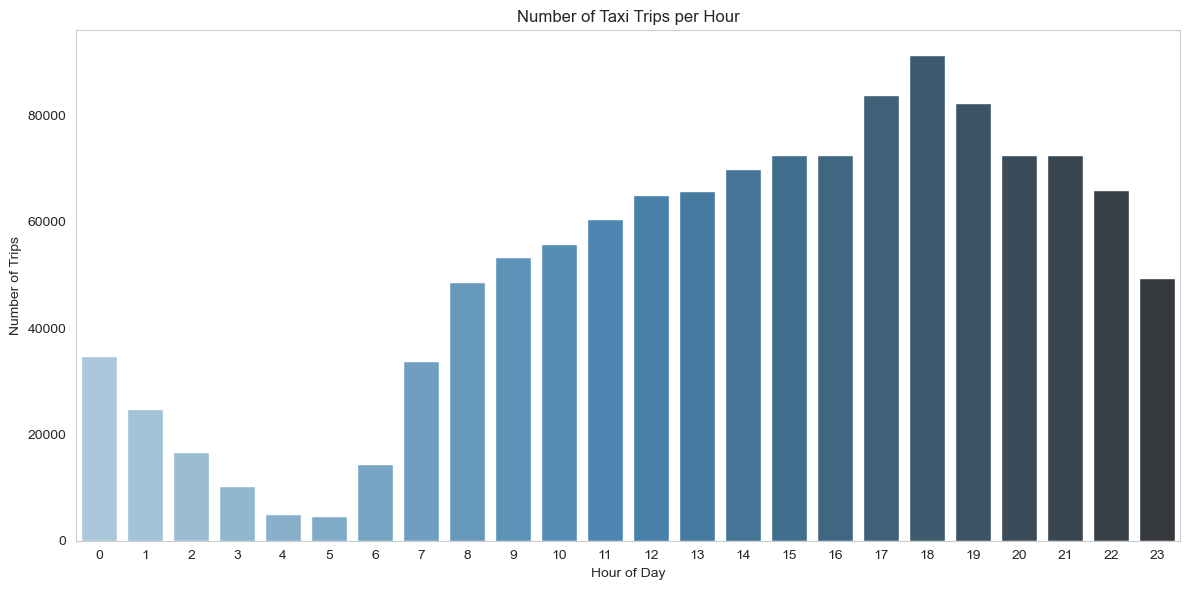

In [317]:
import pandas as pd

df = dfFinalData.copy()
# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count the number of trips per hour
hourly_trip_counts = df['pickup_hour'].value_counts().sort_index()

# Get the top 5 busiest hours
top_5_hours = hourly_trip_counts.sort_values(ascending=False).head(5)

# Display the results
print("Top 5 Busiest Hours:")
for hour, count in top_5_hours.items():
    print(f"{hour}:00 - {hour+1}:00 : {count} trips")

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette='Blues_d')
plt.title('Number of Taxi Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [319]:
# Compare traffic trends for the week days and weekends
df = dfFinalData.copy()

# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour and day of week from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Categorize as 'Weekday' or 'Weekend'
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_hour', hue='day_type', palette='Set2')
plt.title('Hourly Taxi Trip Distribution: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='Day Type')
plt.grid(True)
plt.tight_layout()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
Based on analyses of NYC taxi data:

Weekdays:

Peak hours typically occur during the evening commute, especially between 3:00 PM and 6:00 PM, aligning with standard workday end times.

Weekends:

Trip volumes are generally lower in the early morning hours.

There's a gradual increase in trips throughout the day, often peaking in the late evening or early morning hours, reflecting leisure activities and nightlife.

These patterns highlight the differences in taxi usage between weekdays and weekends, influenced by work schedules and social activities.



**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [321]:
df = dfFinalData.copy()
zone_lookup = zones.copy()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1          2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2          2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
5          1  2023-01-01 00:55:02   2023-01-01 00:59:57              1.0   
11         2  2023-01-01 00:34:19   2023-01-01 00:46:44              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            2.85         1.0                  N           263            41   
1            1.32         1.0                  N            90           137   
2            3.17         1.0                  N            79           141   
5            0.60         1.0                  N           237           237   
11           2.55         1.0                  N           237           239   

    payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0              1  ...        4.12           0.0                    1.0   
1              1  ...        3.56           0.0                    1.0   
2              1  ...        3.98           0.0                    1.0   
5              1  ...        2.30           0.0                    1.0   
11             1  ...        1.50           0.0                    1.0   

    total_amount  congestion_surcharge  airport_fee  Airport_fee  year  \
0          24.72                   2.5          0.0          NaN  2023   
1          21.36                   2.5          0.0          NaN  2023   
2          23.88                   2.5          0.0          NaN  2023   
5          13.80                   2.5          0.0          NaN  2023   
11         21.40                   2.5          0.0          NaN  2023   

      month  payment_type_label  
0   2023-01         Credit card  
1   2023-01         Credit card  
2   2023-01         Credit card  
5   2023-01         Credit card  
11  2023-01         Credit card  

[5 rows x 23 columns]

In [323]:
zone_lookup.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        22.0  
1         0.0  
2        17.0  
3      1446.0  
4         0.0

In [325]:
# Count pickups per location
df.head()
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup_Count']
pickup_counts

# Count drop-offs per location
dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff_Count']


# Merge pickup counts with zone names
pickup_counts = pickup_counts.merge(zone_lookup, on='LocationID', how='left')

# Merge drop-off counts with zone names
dropoff_counts = dropoff_counts.merge(zone_lookup, on='LocationID', how='left')

# Top 10 pickup zones
top_pickup_zones = pickup_counts.head(10)
print("Top 10 Pickup Zones:")
top_pickup_zones.head(10)


Top 10 Pickup Zones:


LocationID  Pickup_Count  OBJECTID  Shape_Leng  Shape_Area  \
0         237         67657     237.0    0.042213    0.000096   
1         161         63036     161.0    0.035804    0.000072   
2         236         60949     236.0    0.044252    0.000103   
3         162         49554     162.0    0.035270    0.000048   
4         142         47104     142.0    0.038176    0.000076   
5         186         45561     186.0    0.024696    0.000037   
6         170         41061     170.0    0.045769    0.000074   
7         239         39401     239.0    0.063626    0.000205   
8         234         39028     234.0    0.036072    0.000073   
9         230         38997     230.0    0.031028    0.000056   

                           zone    borough  \
0         Upper East Side South  Manhattan   
1                Midtown Center  Manhattan   
2         Upper East Side North  Manhattan   
3                  Midtown East  Manhattan   
4           Lincoln Square East  Manhattan   
5  Penn Station/Madison Sq West  Manhattan   
6                   Murray Hill  Manhattan   
7         Upper West Side South  Manhattan   
8                      Union Sq  Manhattan   
9     Times Sq/Theatre District  Manhattan   

                                            geometry  trip_count  
0  POLYGON ((993633.442 216961.016, 993507.232 21...     67657.0  
1  POLYGON ((991081.026 214453.698, 990952.644 21...     63036.0  
2  POLYGON ((995940.048 221122.92, 995812.322 220...     60949.0  
3  POLYGON ((992224.354 214415.293, 992096.999 21...     49554.0  
4  POLYGON ((989380.305 218980.247, 989359.803 21...     47104.0  
5  POLYGON ((986752.603 210853.699, 986627.863 21...     45561.0  
6  POLYGON ((991999.299 210994.739, 991972.635 21...     41061.0  
7  POLYGON ((991168.979 226252.992, 991955.565 22...     39401.0  
8  POLYGON ((987029.847 207022.299, 987048.27 206...     39028.0  
9  POLYGON ((988786.877 214532.094, 988650.277 21...     38997.0

In [331]:
#top_pickup_zones
sns.lineplot(data = top_pickup_zones, x= 'zone',y = 'Pickup_Count')

<Axes: xlabel='zone', ylabel='Pickup_Count'>

In [327]:
# Find top 10 pickup and dropoff zones
# Merge drop-off counts with zone names
dropoff_counts = dropoff_counts.merge(zone_lookup, on='LocationID', how='left')

# Top 10 drop-off zones
top_dropoff_zones = dropoff_counts.head(10)
print("\nTop 10 Drop-off Zones:")
#print(top_dropoff_zones[['Zone', 'borough', 'Dropoff_Count']])
top_dropoff_zones.head(10)


Top 10 Drop-off Zones:


LocationID  Dropoff_Count  OBJECTID_x  Shape_Leng_x  Shape_Area_x  \
0         236          63972       236.0      0.044252      0.000103   
1         237          60641       237.0      0.042213      0.000096   
2         161          51551       161.0      0.035804      0.000072   
3         170          40985       170.0      0.045769      0.000074   
4         142          39581       142.0      0.038176      0.000076   
5         239          39335       239.0      0.063626      0.000205   
6         162          38390       162.0      0.035270      0.000048   
7         141          38008       141.0      0.041514      0.000077   
8          68          34197        68.0      0.049337      0.000111   
9         234          34141       234.0      0.036072      0.000073   

                  zone_x  borough_x  \
0  Upper East Side North  Manhattan   
1  Upper East Side South  Manhattan   
2         Midtown Center  Manhattan   
3            Murray Hill  Manhattan   
4    Lincoln Square East  Manhattan   
5  Upper West Side South  Manhattan   
6           Midtown East  Manhattan   
7        Lenox Hill West  Manhattan   
8           East Chelsea  Manhattan   
9               Union Sq  Manhattan   

                                          geometry_x  trip_count_x  \
0  POLYGON ((995940.048 221122.92, 995812.322 220...       60949.0   
1  POLYGON ((993633.442 216961.016, 993507.232 21...       67657.0   
2  POLYGON ((991081.026 214453.698, 990952.644 21...       63036.0   
3  POLYGON ((991999.299 210994.739, 991972.635 21...       41061.0   
4  POLYGON ((989380.305 218980.247, 989359.803 21...       47104.0   
5  POLYGON ((991168.979 226252.992, 991955.565 22...       39401.0   
6  POLYGON ((992224.354 214415.293, 992096.999 21...       49554.0   
7  POLYGON ((994839.073 216123.698, 994786.74 216...       33674.0   
8  POLYGON ((983690.405 209040.369, 983550.612 20...       34911.0   
9  POLYGON ((987029.847 207022.299, 987048.27 206...       39028.0   

   OBJECTID_y  Shape_Leng_y  Shape_Area_y                 zone_y  borough_y  \
0       236.0      0.044252      0.000103  Upper East Side North  Manhattan   
1       237.0      0.042213      0.000096  Upper East Side South  Manhattan   
2       161.0      0.035804      0.000072         Midtown Center  Manhattan   
3       170.0      0.045769      0.000074            Murray Hill  Manhattan   
4       142.0      0.038176      0.000076    Lincoln Square East  Manhattan   
5       239.0      0.063626      0.000205  Upper West Side South  Manhattan   
6       162.0      0.035270      0.000048           Midtown East  Manhattan   
7       141.0      0.041514      0.000077        Lenox Hill West  Manhattan   
8        68.0      0.049337      0.000111           East Chelsea  Manhattan   
9       234.0      0.036072      0.000073               Union Sq  Manhattan   

                                          geometry_y  trip_count_y  
0  POLYGON ((995940.048 221122.92, 995812.322 220...       60949.0  
1  POLYGON ((993633.442 216961.016, 993507.232 21...       67657.0  
2  POLYGON ((991081.026 214453.698, 990952.644 21...       63036.0  
3  POLYGON ((991999.299 210994.739, 991972.635 21...       41061.0  
4  POLYGON ((989380.305 218980.247, 989359.803 21...       47104.0  
5  POLYGON ((991168.979 226252.992, 991955.565 22...       39401.0  
6  POLYGON ((992224.354 214415.293, 992096.999 21...       49554.0  
7  POLYGON ((994839.073 216123.698, 994786.74 216...       33674.0  
8  POLYGON ((983690.405 209040.369, 983550.612 20...       34911.0  
9  POLYGON ((987029.847 207022.299, 987048.27 206...       39028.0

In [335]:
#top_pickup_zones
sns.lineplot(data = top_dropoff_zones, x= 'zone_x',y = 'Dropoff_Count')

<Axes: xlabel='zone_x', ylabel='Dropoff_Count'>

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [339]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df = dfFinalData.copy()
zone_lookup = zones.copy()

import pandas as pd

# Count pickups per location
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup_Count']

# Count drop-offs per location
dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff_Count']

# Merge pickup and drop-off counts
zone_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

# Merge with zone lookup to get zone names and boroughs
zone_counts = pd.merge(zone_counts, zone_lookup, on='LocationID', how='left')

# Calculate the pickup-to-dropoff ratio
zone_counts['Pickup_to_Dropoff_Ratio'] = zone_counts['Pickup_Count'] / zone_counts['Dropoff_Count'].replace(0, pd.NA)

# Top 10 zones with highest pickup-to-dropoff ratios
top_10_highest = zone_counts.sort_values(by='Pickup_to_Dropoff_Ratio', ascending=False).head(10)

# Top 10 zones with lowest pickup-to-dropoff ratios (excluding zeros)
top_10_lowest = zone_counts[zone_counts['Pickup_to_Dropoff_Ratio'].notna()].sort_values(by='Pickup_to_Dropoff_Ratio').head(10)

print("Top 10 Zones with Highest Pickup-to-Dropoff Ratios:")
#print(top_10_highest.head(10))

print(top_10_highest[['zone', 'borough', 'Pickup_Count', 'Dropoff_Count', 'Pickup_to_Dropoff_Ratio']])

#print("\nTop 10 Zones with Lowest Pickup-to-Dropoff Ratios:")
#print(top_10_lowest[['zone', 'borough', 'Pickup_Count', 'Dropoff_Count', 'Pickup_to_Dropoff_Ratio']])
#print(top_10_lowest.head(10))



Top 10 Zones with Highest Pickup-to-Dropoff Ratios:
                             zone        borough  Pickup_Count  Dropoff_Count  \
126             LaGuardia Airport         Queens        2904.0          231.0   
120                   JFK Airport         Queens        3215.0          387.0   
20        Bloomfield/Emerson Hill  Staten Island           4.0            1.0   
138               Manhattan Beach       Brooklyn           6.0            2.0   
50                   Coney Island       Brooklyn          19.0            7.0   
8                      Bath Beach       Brooklyn           5.0            2.0   
66                  East Elmhurst         Queens         435.0          203.0   
46                     Co-Op City          Bronx          42.0           24.0   
167                   Parkchester          Bronx          53.0           33.0   
171  Penn Station/Madison Sq West      Manhattan       45561.0        28551.0   

    Pickup_to_Dropoff_Ratio  
126               12.57142

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)





In [345]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df = dfFinalData.copy()
# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Filter trips between 11 PM (23) and 5 AM (5)
night_hours = list(range(0, 6)) + [23]
df_night = df[df['pickup_hour'].isin(night_hours)]

# Count pickups per location
pickup_counts = df_night['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'Pickup_Count']

# Count drop-offs per location
dropoff_counts = df_night['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'Dropoff_Count']

# Merge pickup counts with zone names
pickup_counts = pickup_counts.merge(zone_lookup, on='LocationID', how='left')

# Merge drop-off counts with zone names
dropoff_counts = dropoff_counts.merge(zone_lookup, on='LocationID', how='left')

# Top 10 pickup zones
top_pickup_zones = pickup_counts.head(10)
print("Top 10 Pickup Zones During Night Hours:")
print(top_pickup_zones[['zone', 'borough', 'Pickup_Count']])

# Top 10 drop-off zones
top_dropoff_zones = dropoff_counts.head(10)
print("\nTop 10 Drop-off Zones During Night Hours:")
print(top_dropoff_zones[['zone', 'borough', 'Dropoff_Count']])



Top 10 Pickup Zones During Night Hours:
                           zone    borough  Pickup_Count
0                  East Village  Manhattan         12718
1                  West Village  Manhattan         10048
2               Lower East Side  Manhattan          7792
3                  Clinton East  Manhattan          7419
4       Greenwich Village South  Manhattan          7105
5     Times Sq/Theatre District  Manhattan          5212
6  Penn Station/Madison Sq West  Manhattan          5014
7                 Midtown South  Manhattan          4602
8                      Gramercy  Manhattan          4551
9                  East Chelsea  Manhattan          4412

Top 10 Drop-off Zones During Night Hours:
                            zone    borough  Dropoff_Count
0                   East Village  Manhattan           6971
1                   Clinton East  Manhattan           5142
2                    Murray Hill  Manhattan           5093
3                       Gramercy  Manhattan           

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [348]:
# Filter for night hours (11 PM to 5 AM)
df = dfFinalData.copy()

# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Define a function to categorize each trip as 'Nighttime' or 'Daytime'
def categorize_time(hour):
    return 'Nighttime' if (hour >= 23 or hour < 5) else 'Daytime'

# Apply the function to create a new column
df['time_period'] = df['pickup_hour'].apply(categorize_time)

#df['time_period'].head()
# Group by 'time_period' and sum the 'total_amount'
revenue_by_period = df.groupby('time_period')['total_amount'].sum().reset_index()

# Calculate the total revenue
total_revenue = revenue_by_period['total_amount'].sum()

# Calculate the revenue share for each period
revenue_by_period['revenue_share'] = (revenue_by_period['total_amount'] / total_revenue) * 100

# Display the results
print(revenue_by_period)


  time_period  total_amount  revenue_share
0     Daytime   22706991.83      88.375597
1   Nighttime    2986743.26      11.624403


In [350]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(revenue_by_period['revenue_share'], labels=revenue_by_period['time_period'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share: Nighttime vs. Daytime')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [352]:
# Analyse the fare per mile per passenger for different passenger counts
df = dfFinalData.copy()
# Filter out trips with zero or missing values
df_filtered = df[(df['trip_distance'] > 0) & 
                 (df['fare_amount'] > 0) & 
                 (df['passenger_count'] > 0)]

# Calculate fare per mile per passenger
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])
print(df_filtered.head())
# Group by passenger count and calculate average fare per mile per passenger
average_fare = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Rename columns for clarity
average_fare.columns = ['Passenger Count', 'Average Fare per Mile per Passenger']

# Display the results
print(average_fare)

C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\3623536021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_amount'] / (df_filtered['trip_distance'] * df_filtered['passenger_count'])


    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1          2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2          2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
5          1  2023-01-01 00:55:02   2023-01-01 00:59:57              1.0   
11         2  2023-01-01 00:34:19   2023-01-01 00:46:44              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            2.85         1.0                  N           263            41   
1            1.32         1.0                  N            90           137   
2            3.17         1.0                  N            79           141   
5            0.60         1.0                  N           237           237   
11           2.55         1.0                  N           237           239   

    payment_type  ...  tolls_amount  improvement_surcharge  to

In [354]:
sns.barplot(data= average_fare, x= 'Passenger Count', y = 'Average Fare per Mile per Passenger')
          

<Axes: xlabel='Passenger Count', ylabel='Average Fare per Mile per Passenger'>

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [360]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd

# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour and day of the week
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
#print(df.head())

# Filter out trips with zero or missing values
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Calculate fare per mile
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# Average fare per mile by hour
fare_by_hour = df_filtered.groupby('hour')['fare_per_mile'].mean().reset_index()

# Average fare per mile by day of the week
fare_by_day = df_filtered.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# To ensure days are in order from Monday to Sunday
from pandas.api.types import CategoricalDtype
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = CategoricalDtype(categories=day_order, ordered=True)
fare_by_day['day_of_week'] = fare_by_day['day_of_week'].astype(day_type)
fare_by_day = fare_by_day.sort_values('day_of_week')

print(fare_by_day.head())


C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\1906693380.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


  day_of_week  fare_per_mile
1      Monday       8.172829
5     Tuesday       8.778259
6   Wednesday       8.803482
4    Thursday       8.828540
0      Friday       8.460905


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [363]:
# Compare fare per mile for different vendors
df = dfFinalData.copy()
# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract hour
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Filter out trips with zero or missing values
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Calculate fare per mile
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# Group by VendorID and hour
average_fare = df_filtered.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

average_fare.head()
# Rename columns for clarity
average_fare.columns = ['VendorID', 'Hour', 'Average Fare per Mile']

# Display the results
print(average_fare)



C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\2184315221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


    VendorID  Hour  Average Fare per Mile
0          1     0               6.955607
1          1     1               6.878230
2          1     2               6.800110
3          1     3               6.616752
4          1     4               6.834581
5          1     5               7.109907
6          1     6               7.093006
7          1     7               7.555902
8          1     8               8.303617
9          1     9               8.703806
10         1    10               8.796963
11         1    11               9.152522
12         1    12               9.213782
13         1    13               9.162721
14         1    14               9.185650
15         1    15               9.199631
16         1    16               9.004864
17         1    17               8.904093
18         1    18               8.647201
19         1    19               8.158091
20         1    20               7.686748
21         1    21               7.373724
22         1    22               7

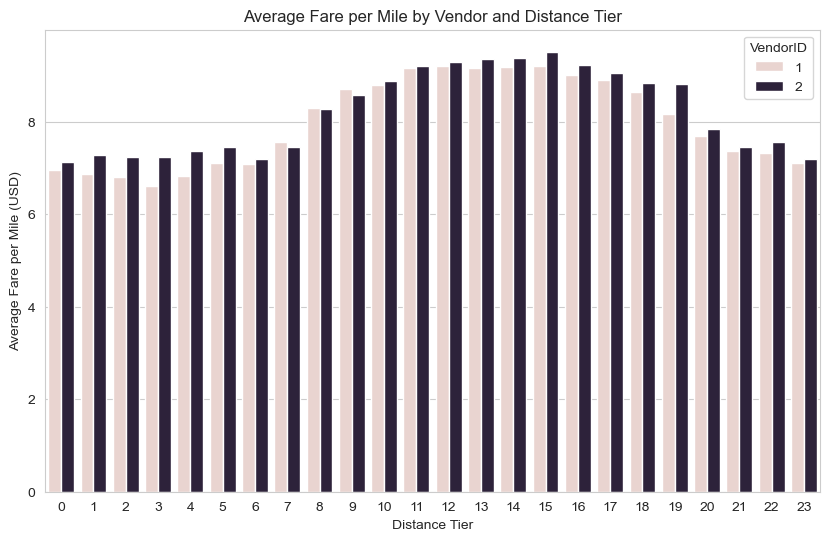

In [366]:
#sns.barplot(data = average_fare, x = 'Hour' , y = Average Fare per Mile
#average_fare.columns = ['VendorID', 'Hour', 'Average Fare per Mile']
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_fare, x='Hour', y='Average Fare per Mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='VendorID')
plt.show()

            

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\4049882229.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(categorize_distance)
C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\4049882229.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']


   VendorID       Distance Tier  Average Fare per Mile
0         1     Long (>5 miles)               4.649797
1         1  Medium (2–5 miles)               6.258836
2         1    Short (≤2 miles)               9.460516
3         2     Long (>5 miles)               4.726031
4         2  Medium (2–5 miles)               6.411678
5         2    Short (≤2 miles)               9.655981


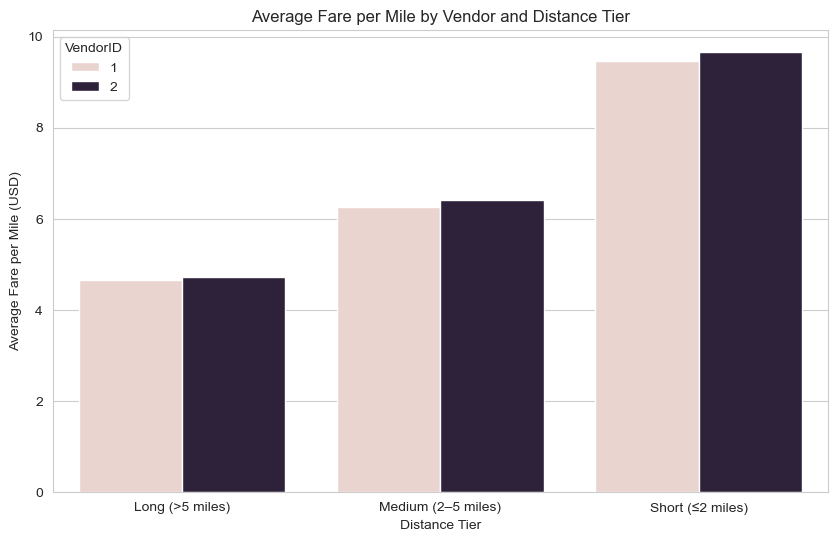

In [370]:
# Defining distance tiers
df = dfFinalData.copy()

# Filter out trips with zero or missing values
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Define distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return 'Short (≤2 miles)'
    elif distance <= 5:
        return 'Medium (2–5 miles)'
    else:
        return 'Long (>5 miles)'

# Apply the function to create a new column
df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(categorize_distance)

# Calculate fare per mile
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']




# Group by VendorID and distance tier
average_fare = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Rename columns for clarity
average_fare.columns = ['VendorID', 'Distance Tier', 'Average Fare per Mile']

# Display the results
print(average_fare)

# Set the style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_fare, x='Distance Tier', y='Average Fare per Mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='VendorID')
plt.show()






In [ ]:
average_fare.head()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\2515389302.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(categorize_distance)
C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\2515389302.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\2515389302.py:32: SettingWithCopyWarning: 
A value is trying to be set on a

  PickupTimes       Distance Tier  tip_percentage
0    3PM- 9PM     Long (>5 miles)        0.186567
1    3PM- 9PM  Medium (2–5 miles)        0.249080
2    3PM- 9PM    Short (≤2 miles)        0.293458
3    7AM- 9AM     Long (>5 miles)        0.177305
4    7AM- 9AM  Medium (2–5 miles)        0.239024
5    7AM- 9AM    Short (≤2 miles)        0.274766
6   9PM- 12AM     Long (>5 miles)        0.230142
7   9PM- 12AM  Medium (2–5 miles)        0.250505
8   9PM- 12AM    Short (≤2 miles)        0.293458


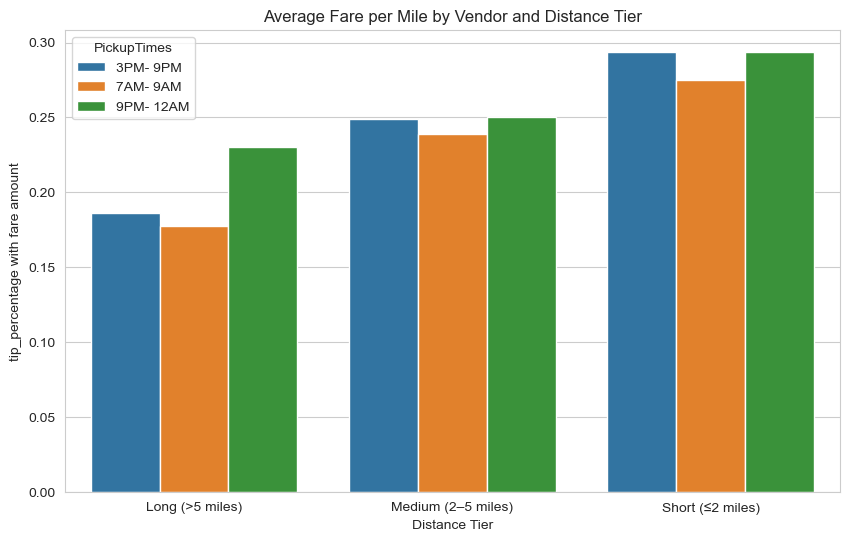

In [372]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Defining distance tiers
df = dfFinalData.copy()

# Filter out trips with zero or missing values
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Define distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return 'Short (≤2 miles)'
    elif distance <= 5:
        return 'Medium (2–5 miles)'
    else:
        return 'Long (>5 miles)'

def pickuptimes(hour):
    if ((hour >= 7) & (hour < 9)) :
        return '7AM- 9AM'
    if ((hour >= 15) & (hour < 21)):
        return '3PM- 9PM'
    if ((hour >= 21) & (hour <= 24)):
        return '9PM- 12AM'
    
# Apply the function to create a new column
df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(categorize_distance)

df_filtered['hour'] = df_filtered['tpep_pickup_datetime'].dt.hour

# Apply the function to create a new column
df_filtered['pickuptimes'] = df_filtered['hour'].apply(pickuptimes)

# Calculate fare per mile
#df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

df_filtered = df_filtered[(df_filtered['fare_amount'] > 0) & (df_filtered['tip_amount'] >= 0)]  # Filter out invalid entries
df_filtered['tip_percentage'] = df_filtered['tip_amount'] / df_filtered['fare_amount']

# Group by VendorID and distance tier
TipPercentage = df_filtered.groupby(['pickuptimes', 'distance_tier'])['tip_percentage'].median().reset_index()

# Rename columns for clarity
TipPercentage.columns = ['PickupTimes', 'Distance Tier', 'tip_percentage']

# Display the results
print(TipPercentage)

# Set the style
sns.set_style("whitegrid")


# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=TipPercentage, x='Distance Tier', y='tip_percentage', hue='PickupTimes')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('tip_percentage with fare amount')
plt.legend(title='PickupTimes')
plt.show()







Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [379]:
df = dfFinalData.copy()
# Extract hour and day of the week
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
#print(df.head())

passengerVar = df.groupby(['day_of_week','hour'])['passenger_count'].sum().reset_index()
#average_fare = df_filtered.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()


passengerVar.tail(30)

plt.figure(figsize=(16, 8))
sns.barplot(data=passengerVar, x='day_of_week', y='passenger_count', hue='hour')
#plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('day_of_week and hour')
plt.ylabel('passenger_count with respect to weekday and hour ')
plt.legend(title='hour')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [383]:
df = dfFinalData.copy()
zone_lookup = zones.copy()
zone_lookup.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        22.0  
1         0.0  
2        17.0  
3      1446.0  
4         0.0

In [387]:
# How does passenger count vary across zones




# Merge pickup counts with zone names
passenger_counts = df.merge(zone_lookup, left_on='PULocationID', right_on='LocationID')
passenger_counts.groupby('zone')['passenger_count'].sum().reset_index()
passenger_counts.head()
plt.figure(figsize=(16, 8))
sns.barplot(data= passenger_counts, x='zone', y='passenger_count')
plt.title('passenger count vary across zones')
plt.xlabel('Zone')
plt.ylabel('passenger_count')
#plt.legend(title='day_of_week')
plt.show()
#Try with Mode , max 

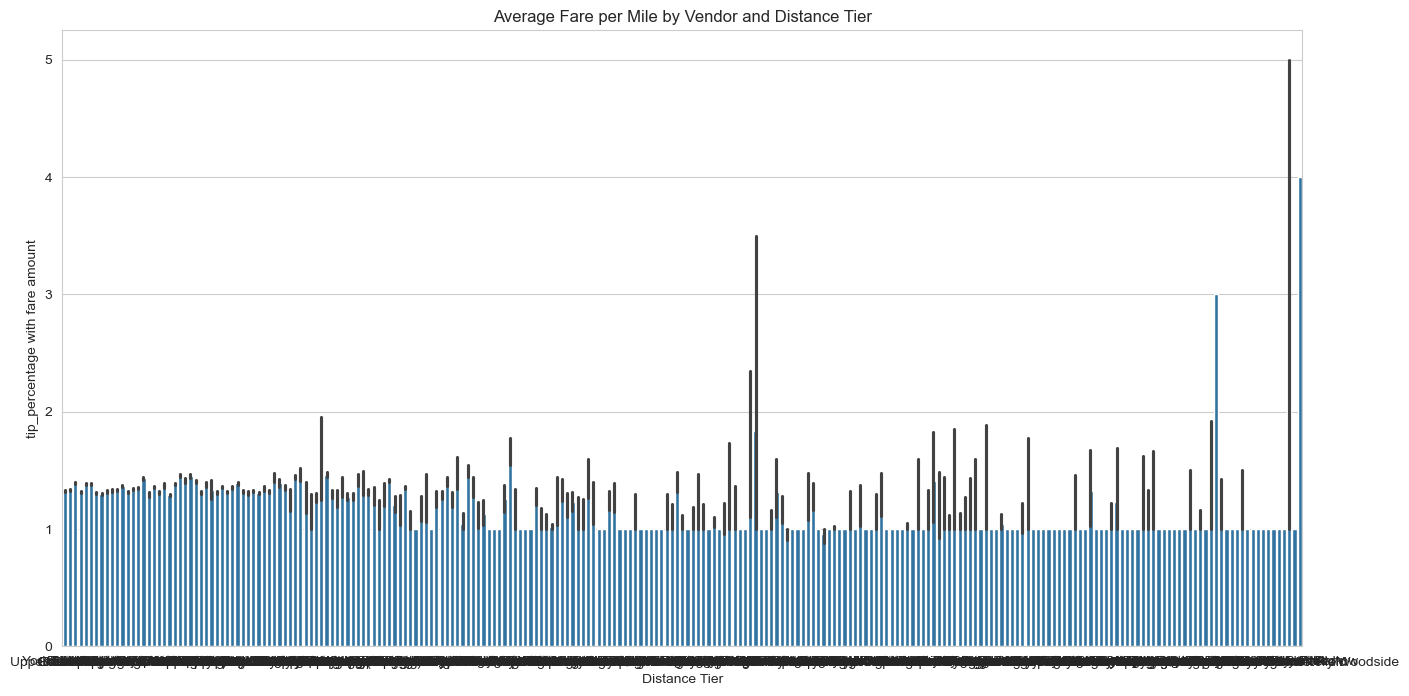

In [393]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

df = dfFinalData.copy()
zone_lookup = zones.copy()

#df
# Merge pickup counts with zone names
passenger_counts = df.merge(zone_lookup, left_on='PULocationID', right_on='LocationID')
passenger_counts.groupby('zone')['passenger_count'].mean().reset_index()
passenger_counts.head()

plt.figure(figsize=(16, 8))
sns.barplot(data=passenger_counts, x='zone', y='passenger_count')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('tip_percentage with fare amount')
#plt.legend(title='day_of_week')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [399]:
# How often is each surcharge applied?
# How does passenger count vary across zones





In [401]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataset
df = dfFinalData.copy()

# Extract hour and day of the week from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Merge with zone lookup to get zone names
df = df.merge(zone_lookup, left_on='PULocationID', right_on='LocationID')

# Group by zone and hour to calculate average extra charges
zone_hour_extra = df.groupby(['zone', 'hour'])['extra'].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(data=zone_hour_extra, x='zone', y='extra', hue='hour')
plt.title('Average Extra Charges by Zone and Hour')
plt.xlabel('Zone')
plt.ylabel('Average Extra Charge ($)')
plt.legend(title='Hour of Day')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\satya s\AppData\Local\Temp\ipykernel_25832\3826318863.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [403]:
zone_hour_extra.head()

zone  hour  extra
0  Allerton/Pelham Gardens     5    0.0
1  Allerton/Pelham Gardens     8    0.0
2  Allerton/Pelham Gardens     9    0.0
3  Allerton/Pelham Gardens    10    0.0
4  Allerton/Pelham Gardens    11    0.0

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.